In [2]:
# version python 3.6
import cv2
import os
import subprocess
from matplotlib import pyplot as plt
def image_to_string(img, cleanup=True, plus=''):
    # cleanup为True则识别完成后删除生成的文本文件
    # plus参数为给tesseract的附加高级参数
    subprocess.check_output('tesseract ' + img + ' ' +
                            img + ' ' + plus, shell=True)  # 生成同名txt文件
    text = ''
    with open(img + '.txt', 'r') as f:
        text = f.read().strip()
    if cleanup:
        os.remove(img + '.txt')
    return text


import numpy as np
import csv
from PIL import Image # if you do not have PIL, do "pip install Pillow"
from PIL import ImageEnhance
from PIL import ImageFilter
import os
import re
import math

In [3]:
print(1)

1


In [ ]:
def binarify(name,n):
    img = cv2.imread(name,0)
    img = cv2.GaussianBlur(img,(3,3),0)
    th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,n,3)
#     th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,n,2)
#     ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.subplot(122),plt.imshow(th1,cmap = 'gray')
    plt.title('binary'), plt.xticks([]), plt.yticks([])
    plt.show()
    print(name)
    return th1

############## all you need to modify
adress = "/Users/yiranchen/Documents/GitHub/tickets/tickets/"
resize = 1 #0.15
box_size = 0.1 # the size of box is ten percent larger than orginal size, set 0 if don't want to enlarge the size of box
###############


tickets_true_equi = adress+"tickets_true_equi/"
#tickets_true_equi = adress+"tickets_true_extra_equi/"
tickets_save = adress+"tickets_save/"
#tickets_save = adress+"tickets_save_extra/"

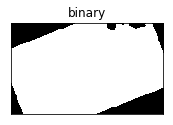

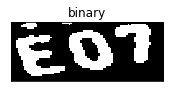

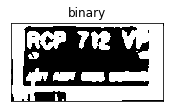

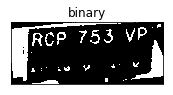

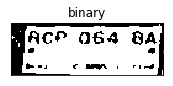

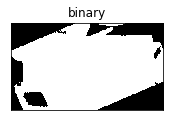

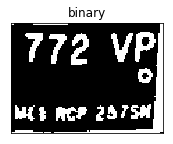

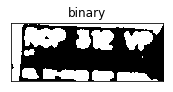

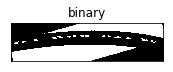

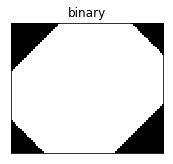

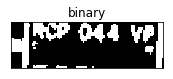

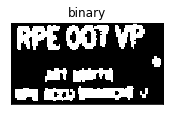

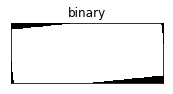

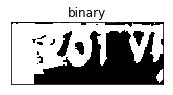

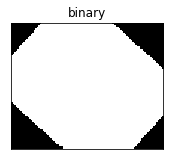

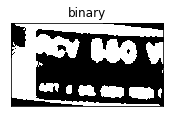

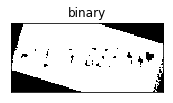

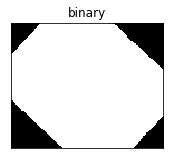

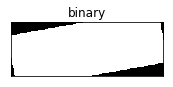

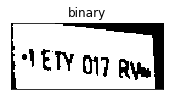

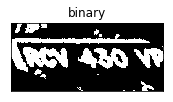

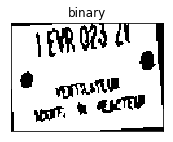

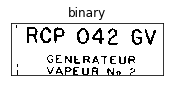

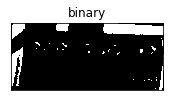

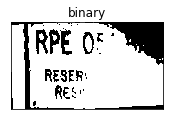

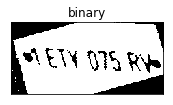

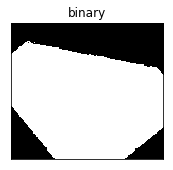

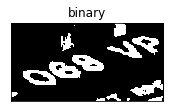

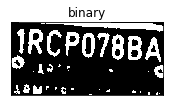

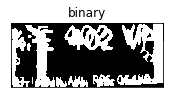

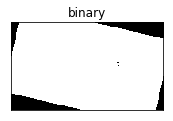

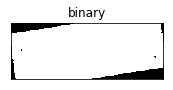

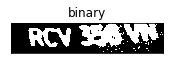

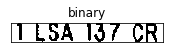

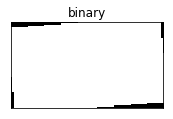

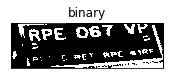

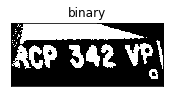

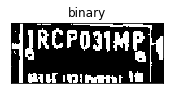

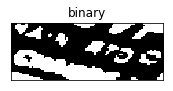

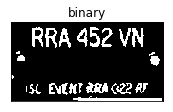

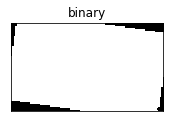

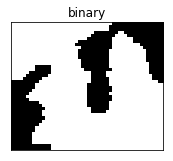

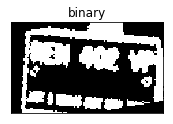

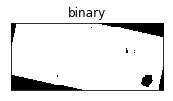

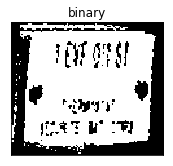

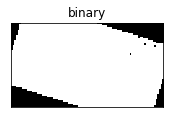

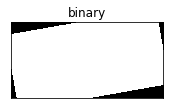

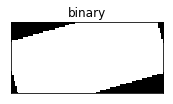

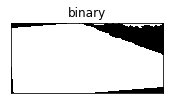

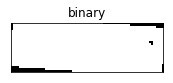

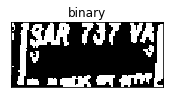

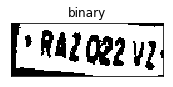

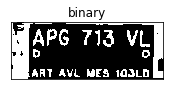

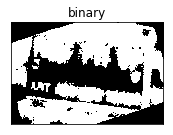

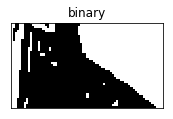

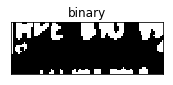

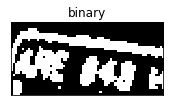

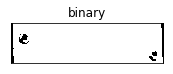

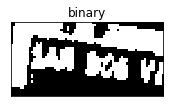

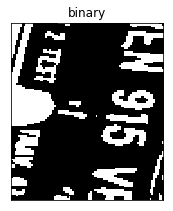

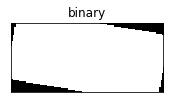

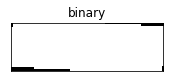

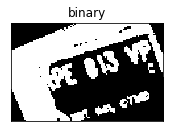

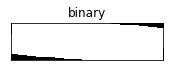

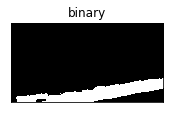

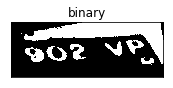

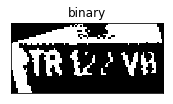

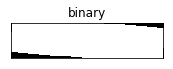

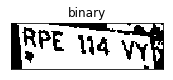

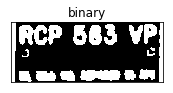

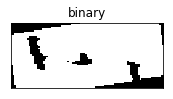

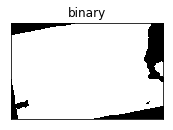

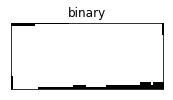

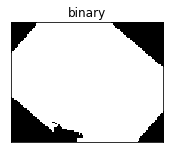

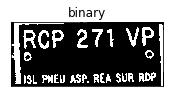

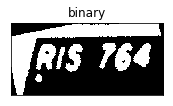

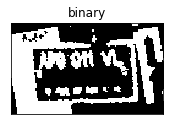

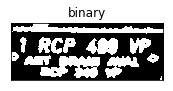

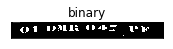

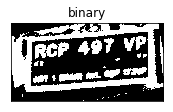

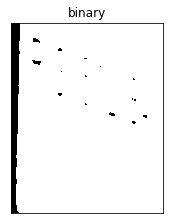

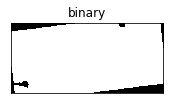

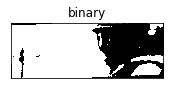

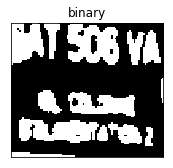

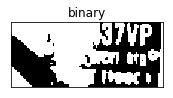

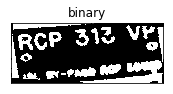

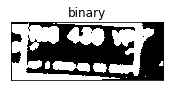

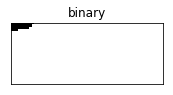

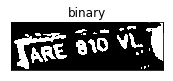

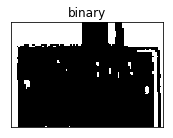

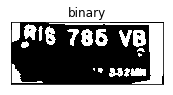

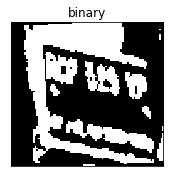

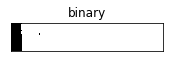

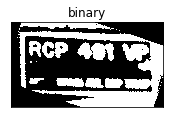

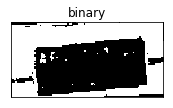

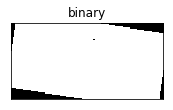

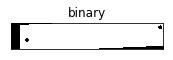

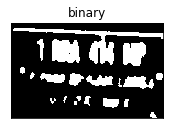

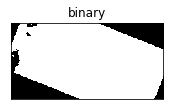

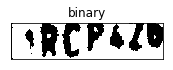

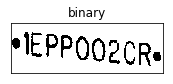

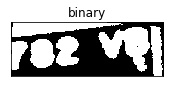

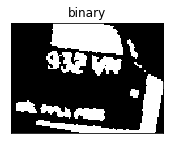

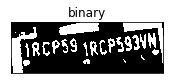

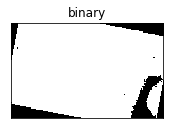

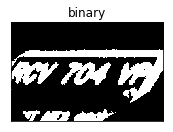

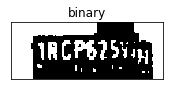

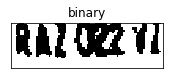

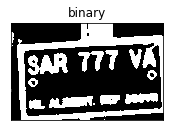

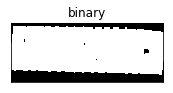

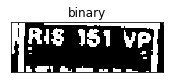

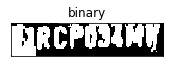

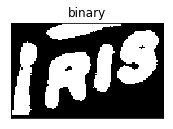

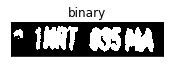

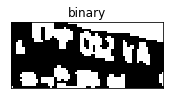

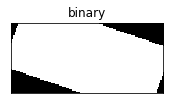

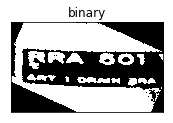

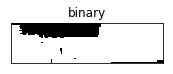

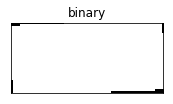

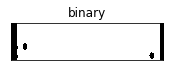

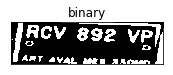

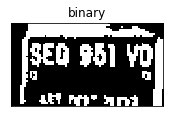

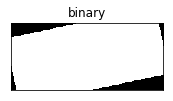

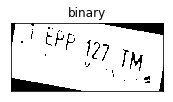

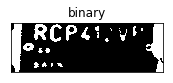

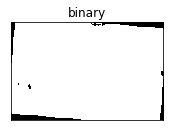

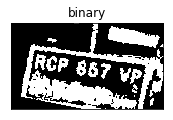

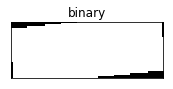

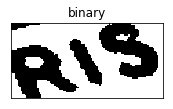

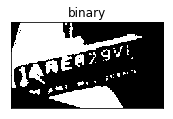

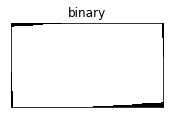

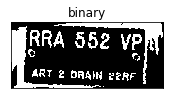

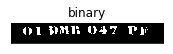

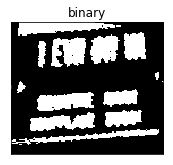

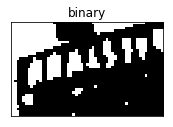

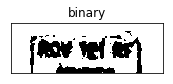

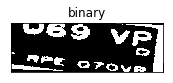

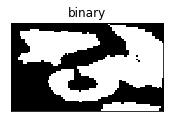

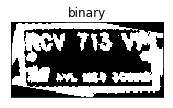

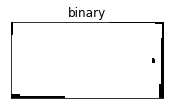

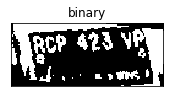

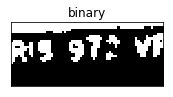

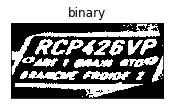

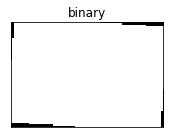

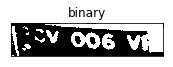

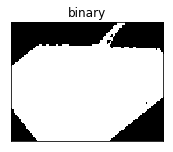

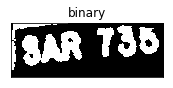

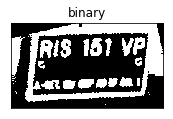

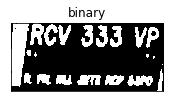

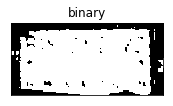

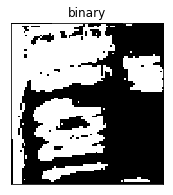

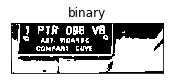

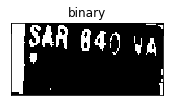

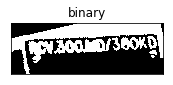

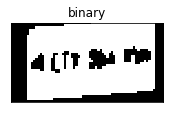

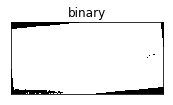

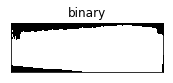

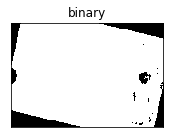

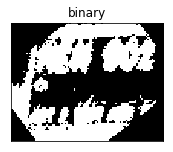

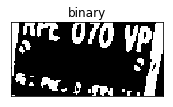

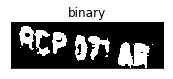

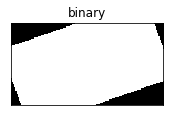

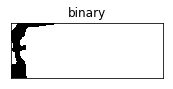

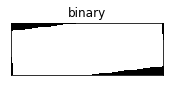

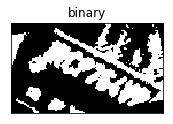

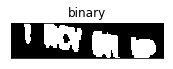

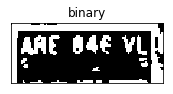

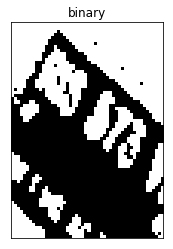

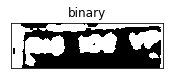

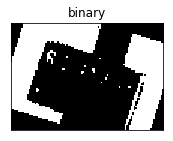

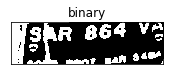

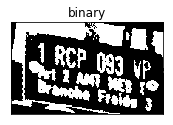

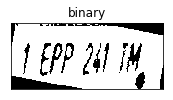

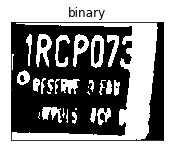

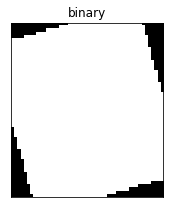

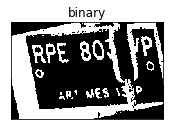

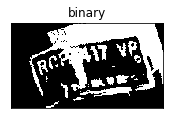

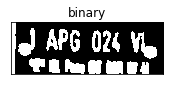

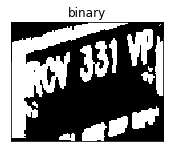

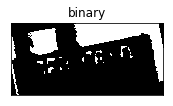

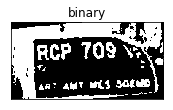

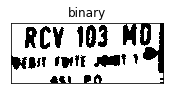

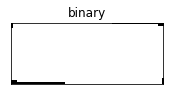

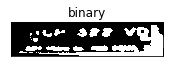

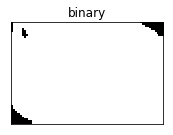

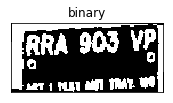

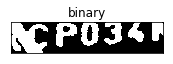

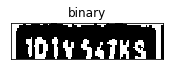

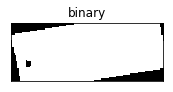

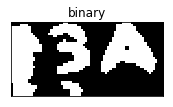

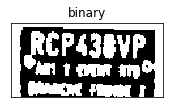

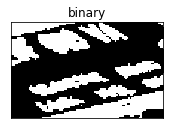

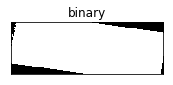

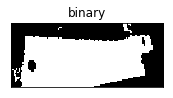

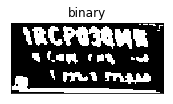

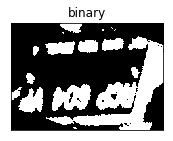

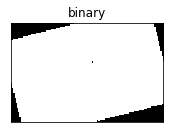

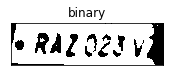

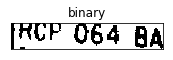

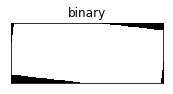

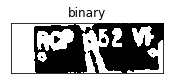

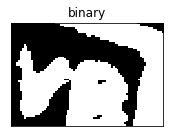

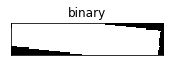

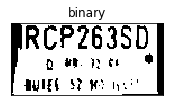

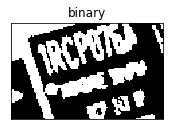

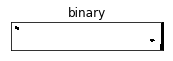

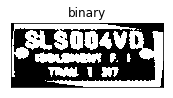

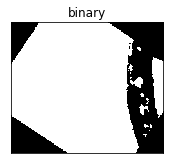

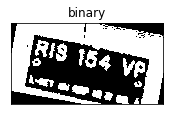

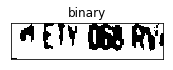

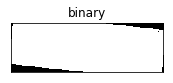

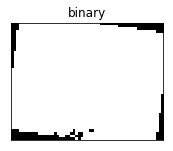

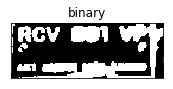

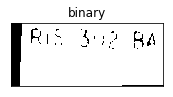

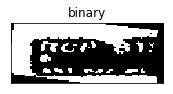

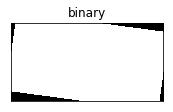

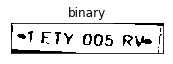

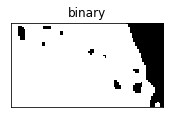

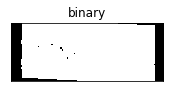

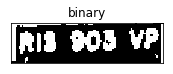

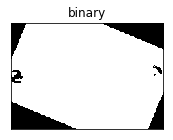

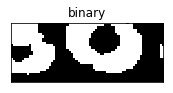

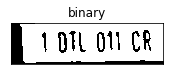

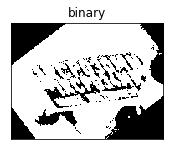

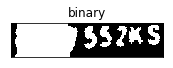

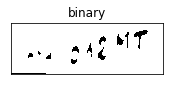

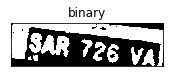

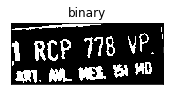

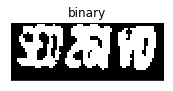

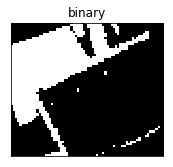

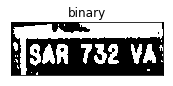

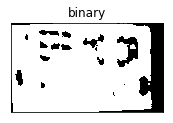

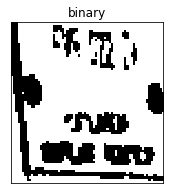

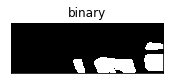

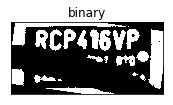

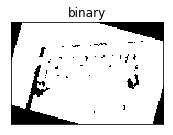

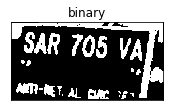

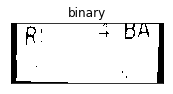

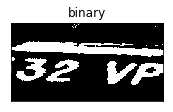

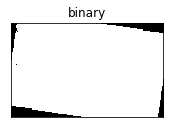

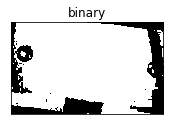

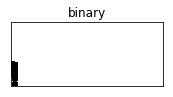

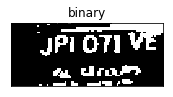

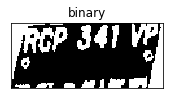

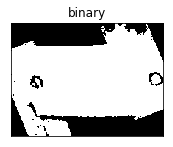

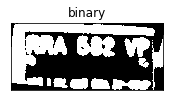

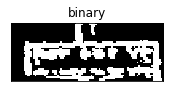

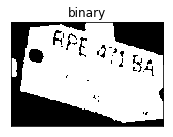

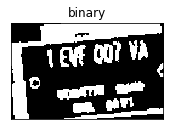

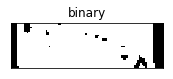

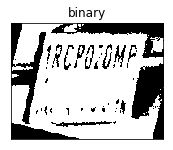

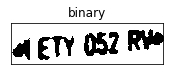

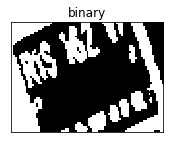

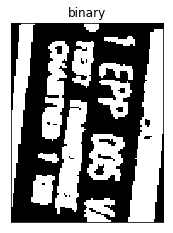

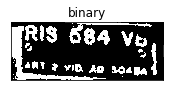

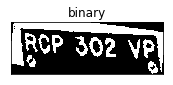

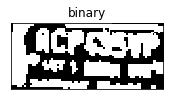

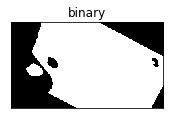

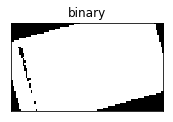

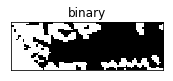

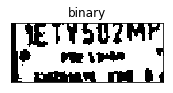

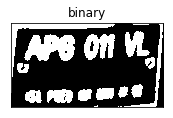

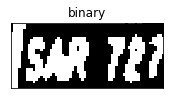

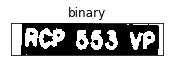

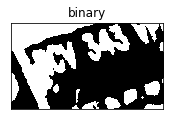

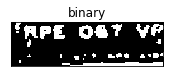

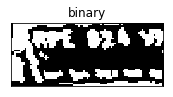

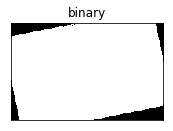

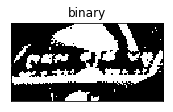

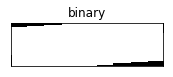

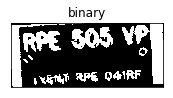

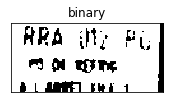

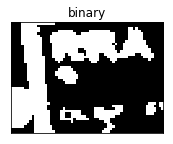

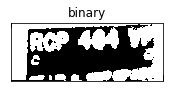

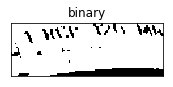

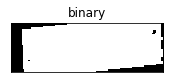

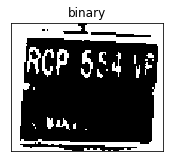

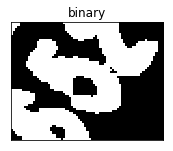

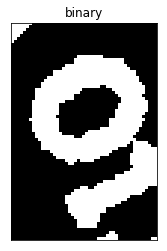

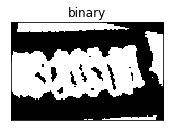

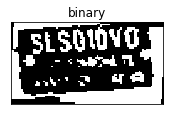

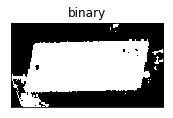

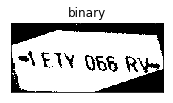

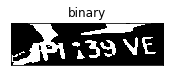

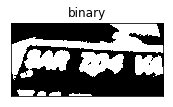

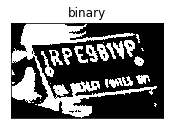

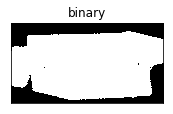

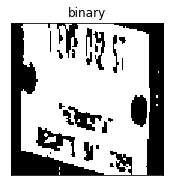

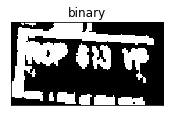

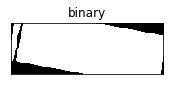

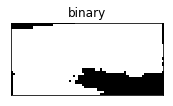

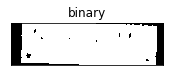

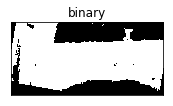

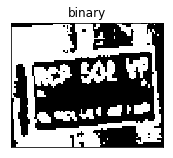

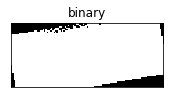

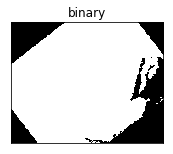

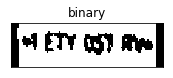

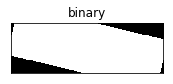

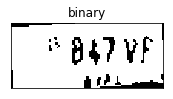

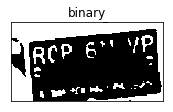

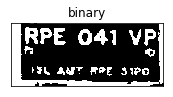

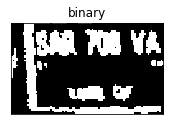

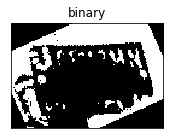

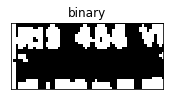

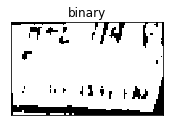

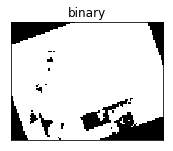

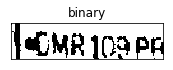

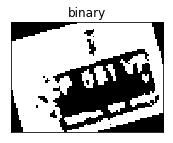

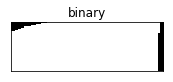

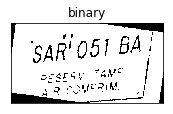

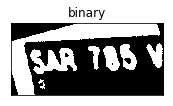

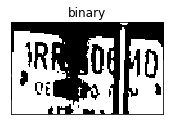

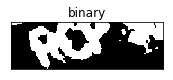

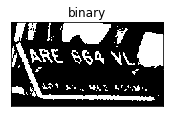

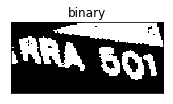

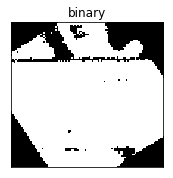

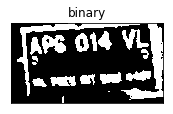

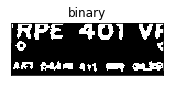

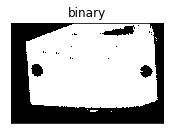

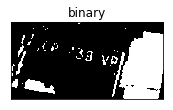

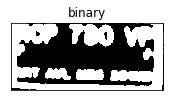

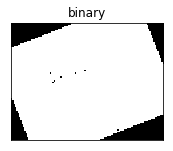

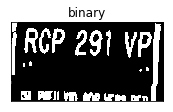

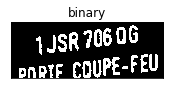

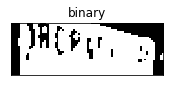

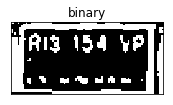

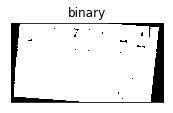

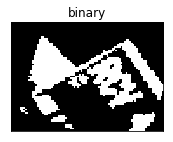

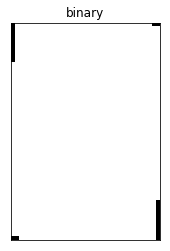

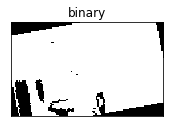

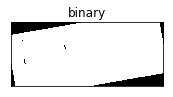

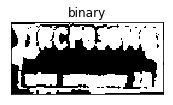

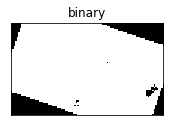

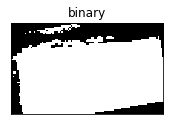

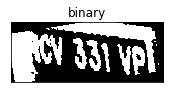

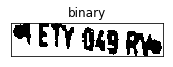

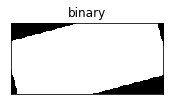

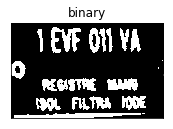

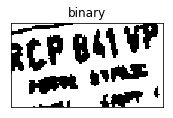

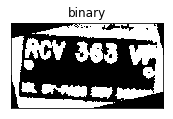

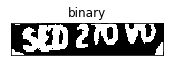

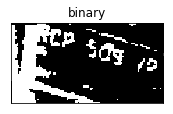

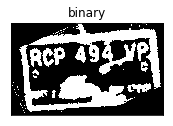

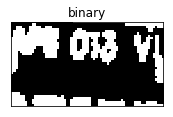

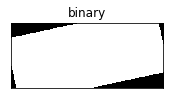

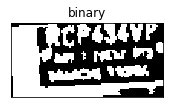

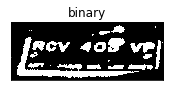

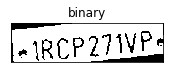

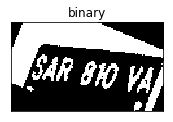

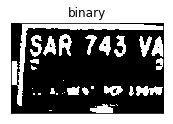

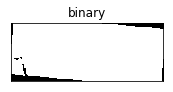

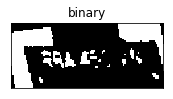

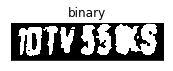

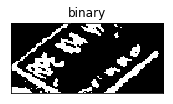

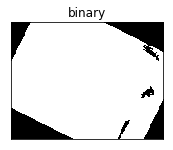

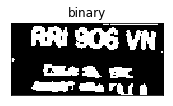

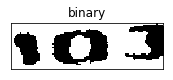

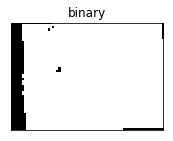

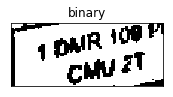

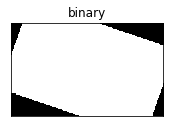

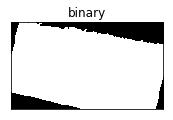

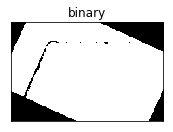

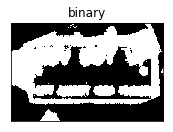

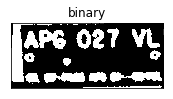

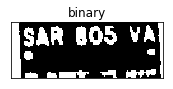

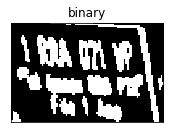

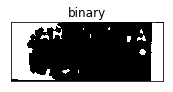

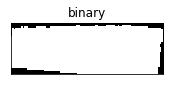

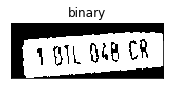

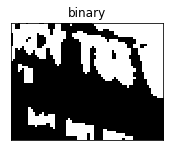

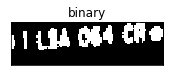

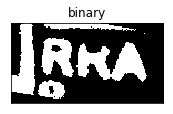

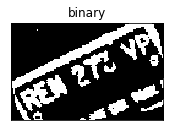

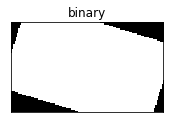

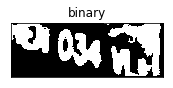

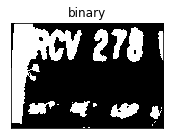

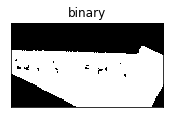

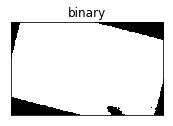

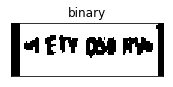

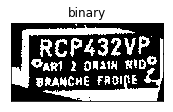

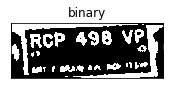

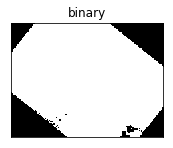

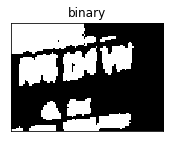

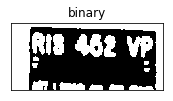

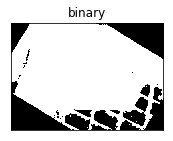

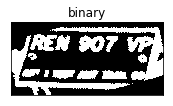

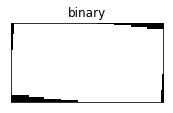

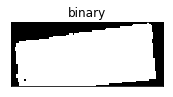

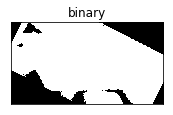

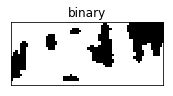

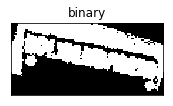

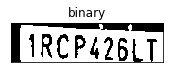

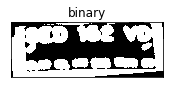

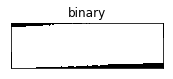

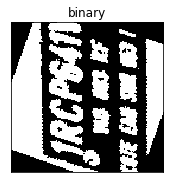

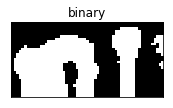

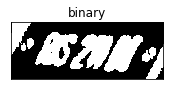

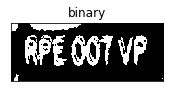

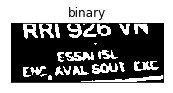

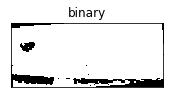

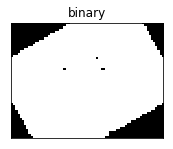

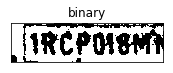

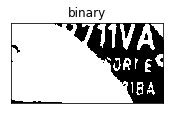

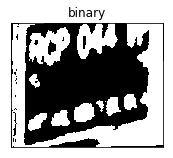

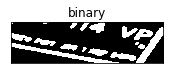

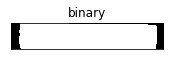

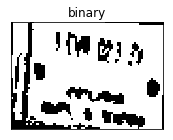

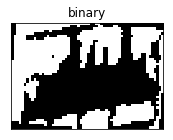

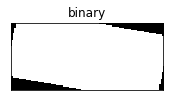

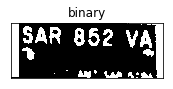

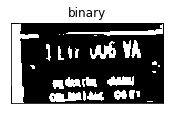

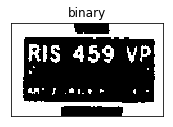

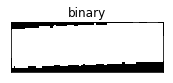

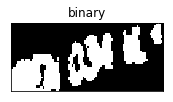

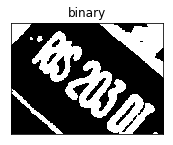

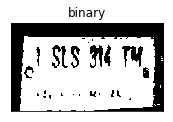

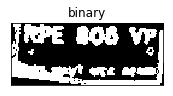

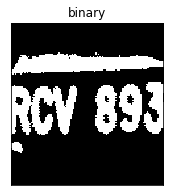

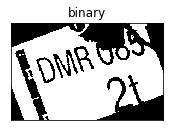

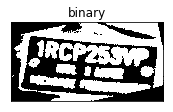

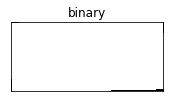

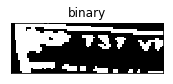

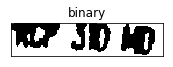

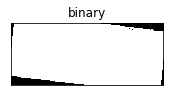

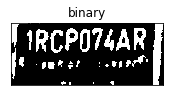

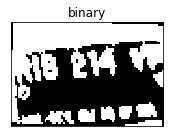

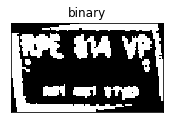

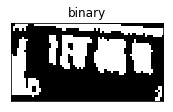

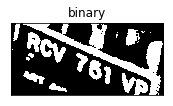

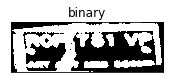

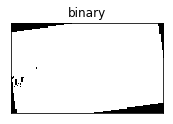

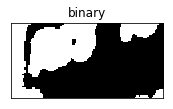

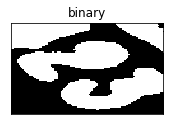

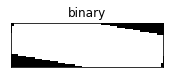

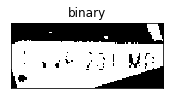

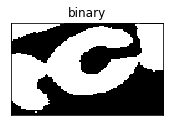

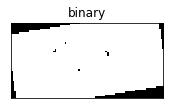

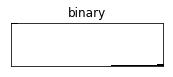

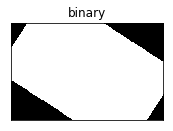

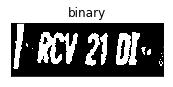

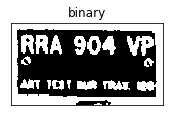

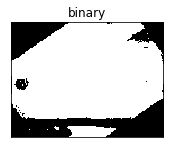

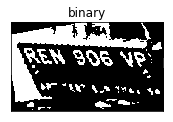

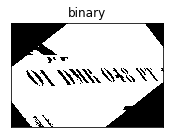

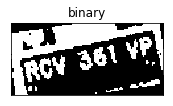

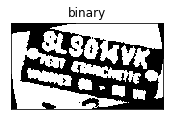

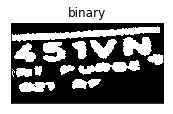

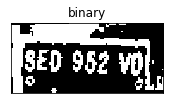

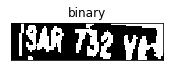

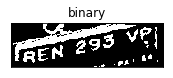

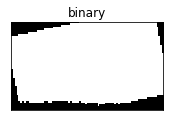

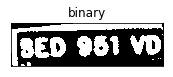

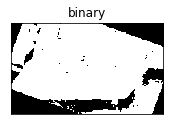

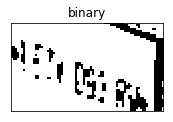

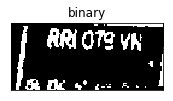

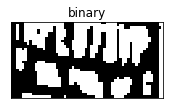

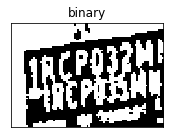

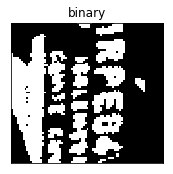

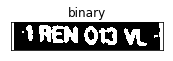

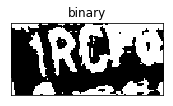

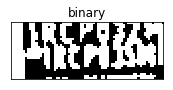

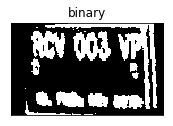

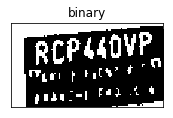

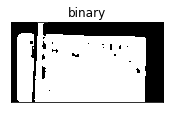

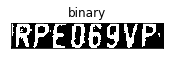

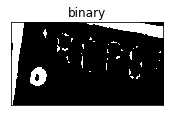

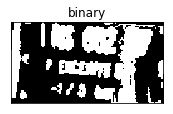

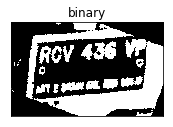

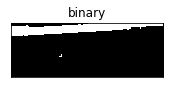

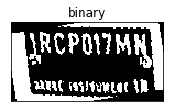

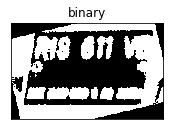

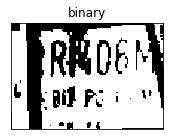

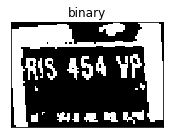

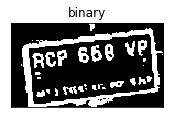

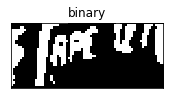

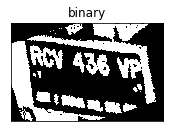

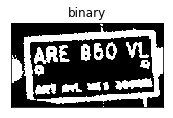

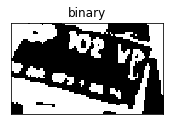

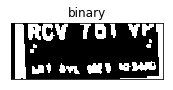

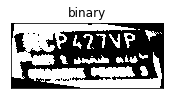

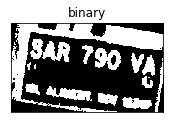

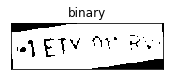

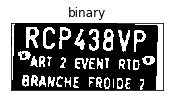

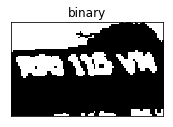

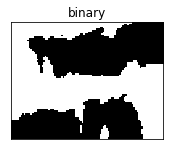

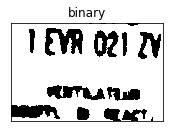

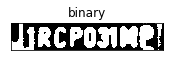

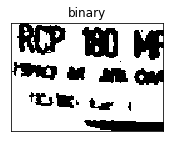

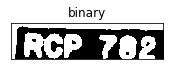

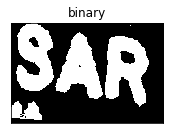

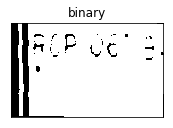

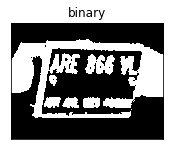

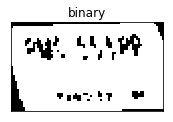

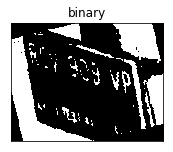

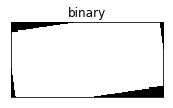

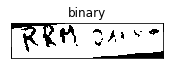

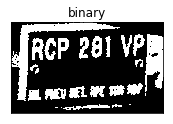

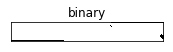

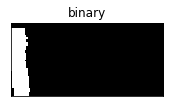

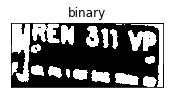

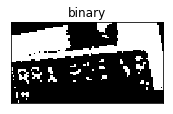

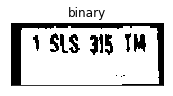

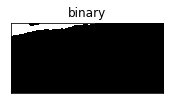

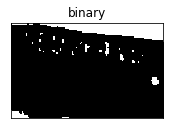

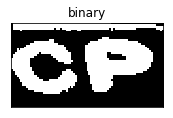

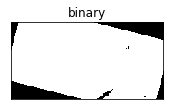

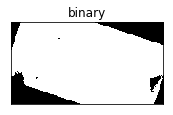

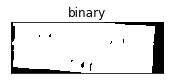

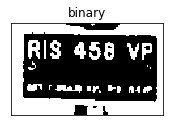

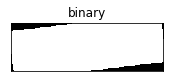

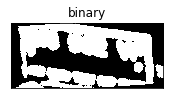

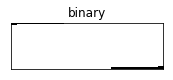

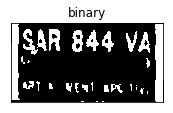

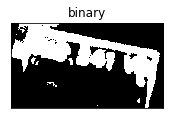

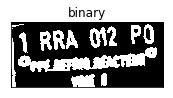

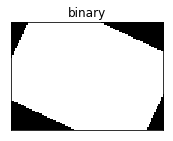

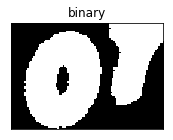

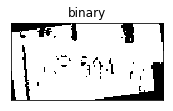

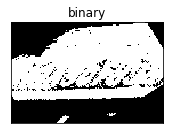

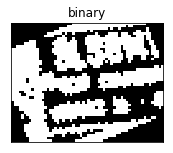

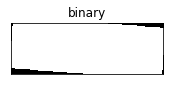

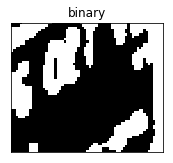

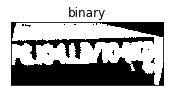

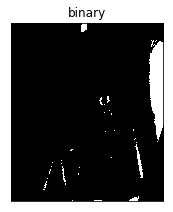

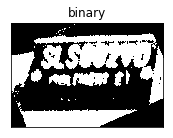

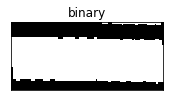

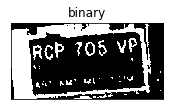

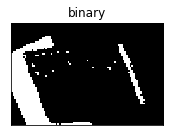

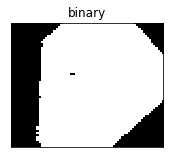

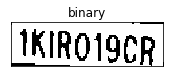

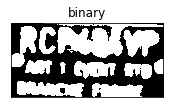

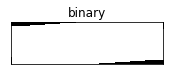

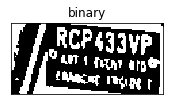

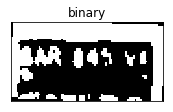

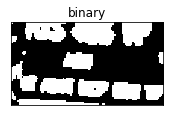

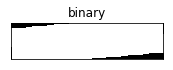

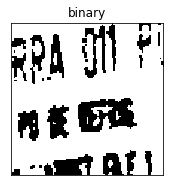

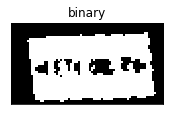

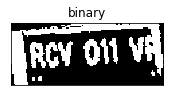

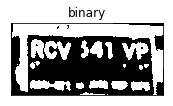

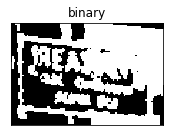

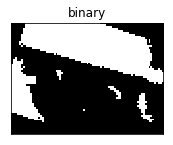

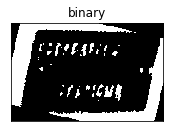

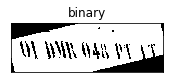

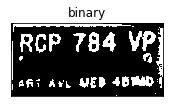

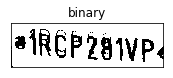

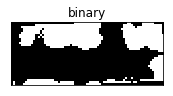

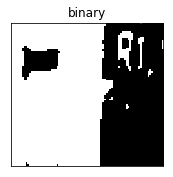

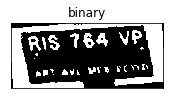

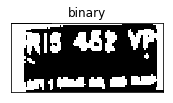

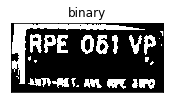

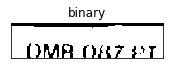

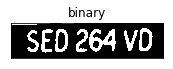

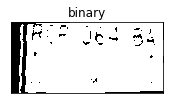

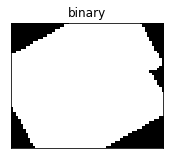

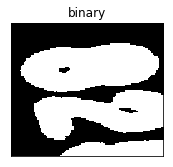

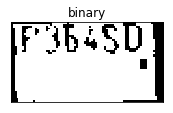

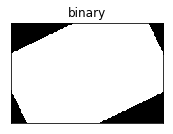

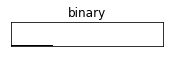

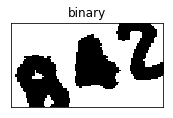

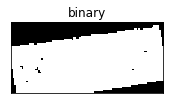

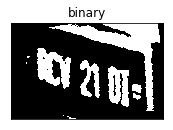

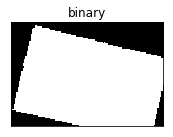

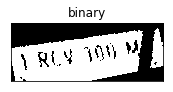

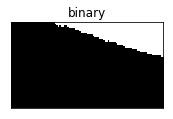

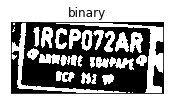

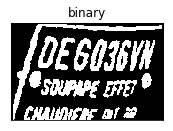

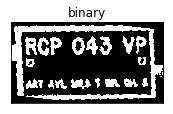

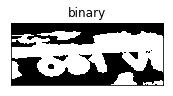

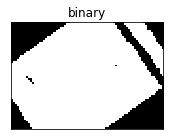

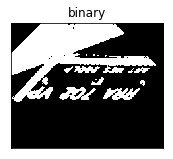

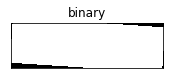

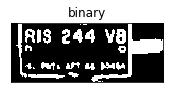

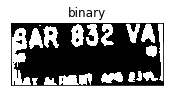

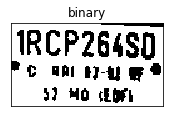

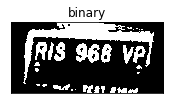

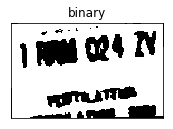

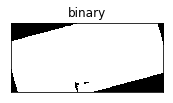

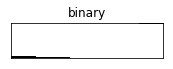

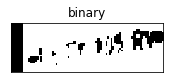

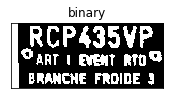

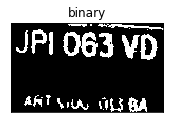

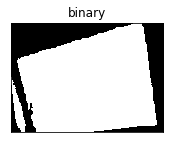

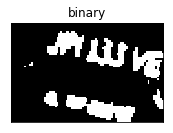

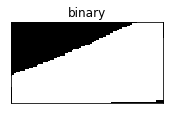

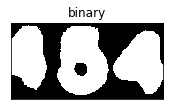

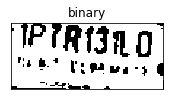

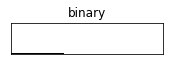

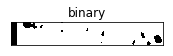

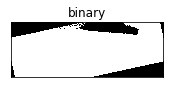

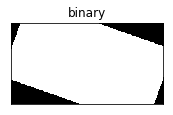

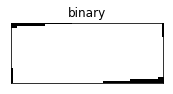

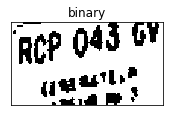

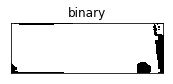

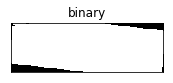

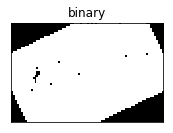

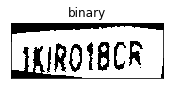

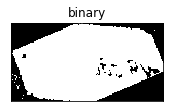

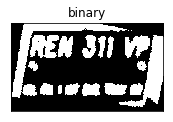

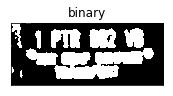

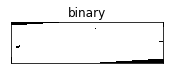

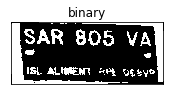

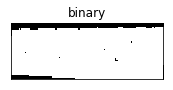

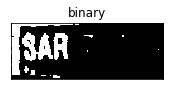

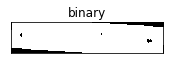

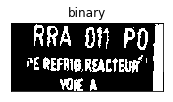

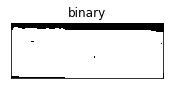

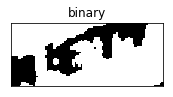

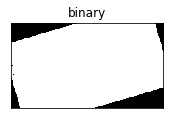

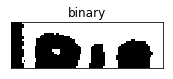

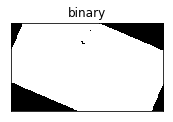

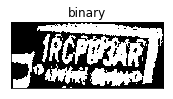

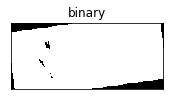

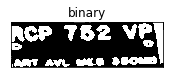

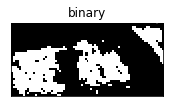

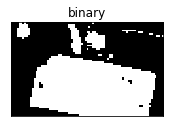

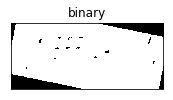

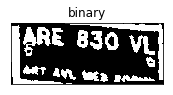

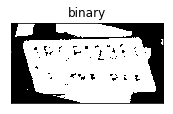

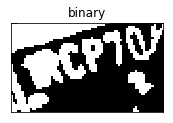

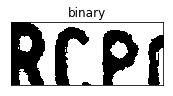

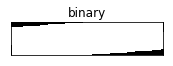

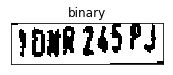

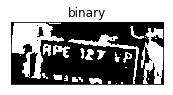

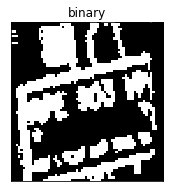

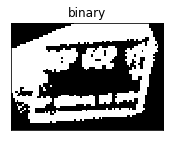

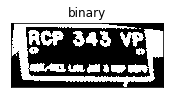

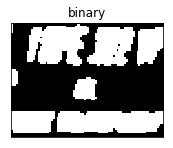

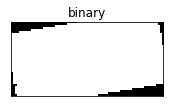

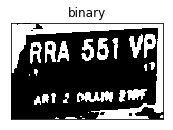

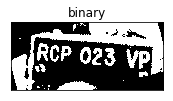

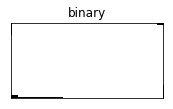

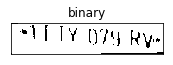

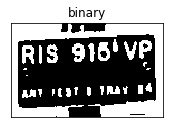

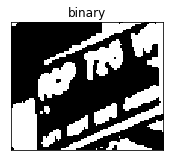

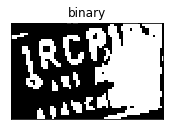

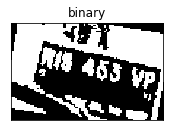

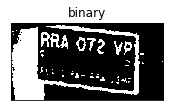

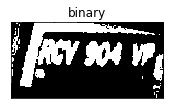

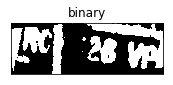

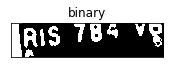

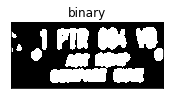

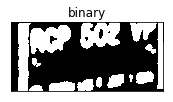

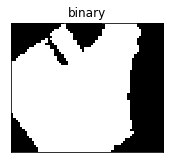

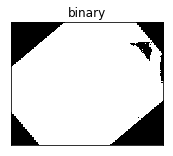

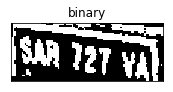

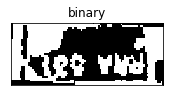

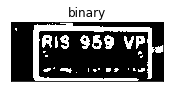

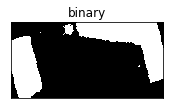

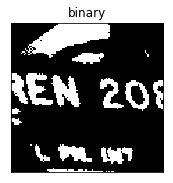

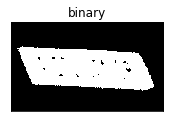

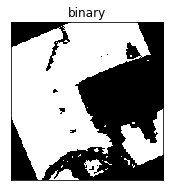

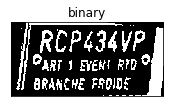

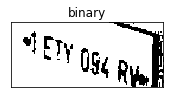

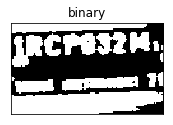

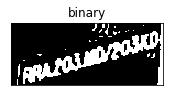

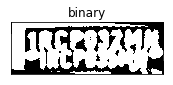

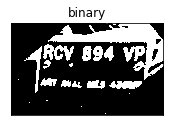

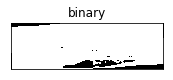

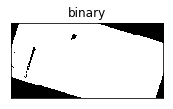

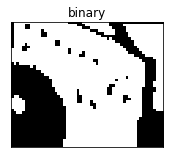

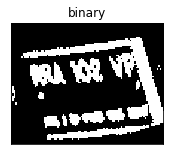

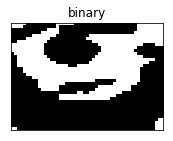

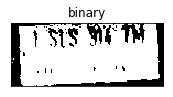

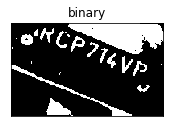

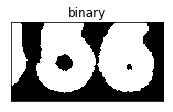

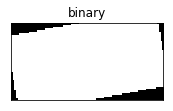

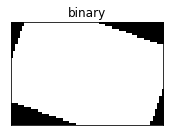

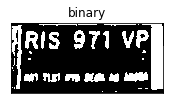

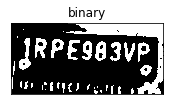

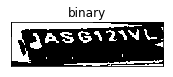

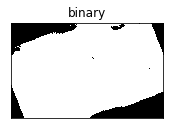

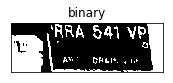

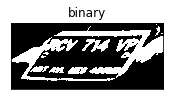

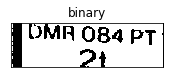

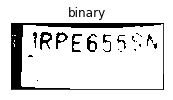

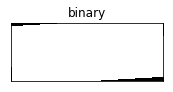

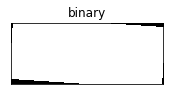

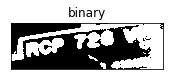

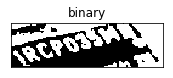

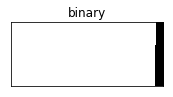

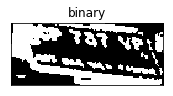

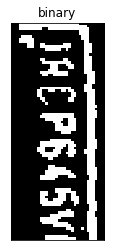

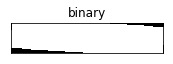

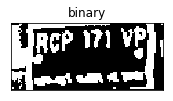

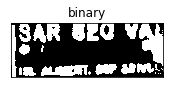

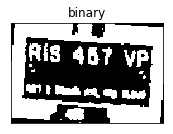

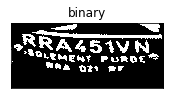

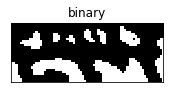

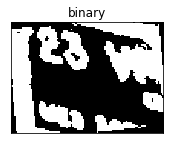

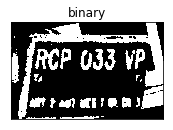

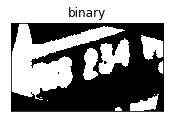

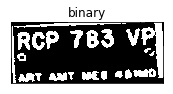

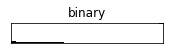

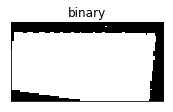

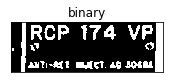

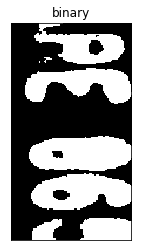

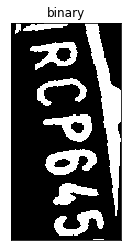

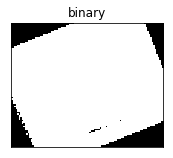

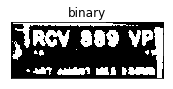

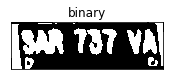

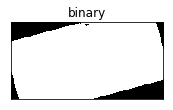

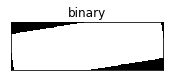

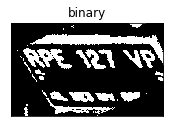

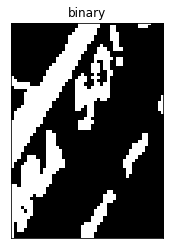

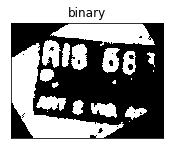

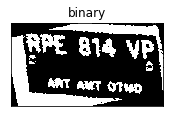

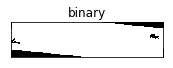

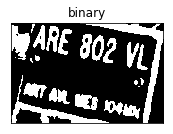

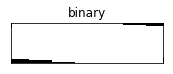

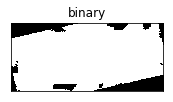

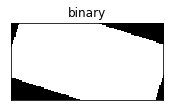

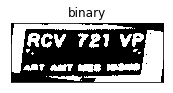

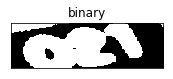

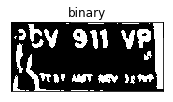

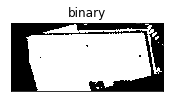

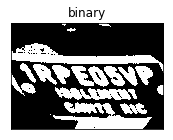

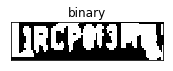

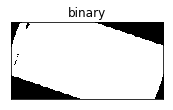

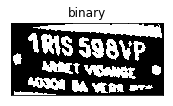

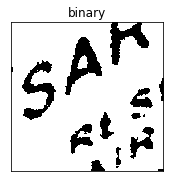

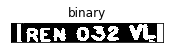

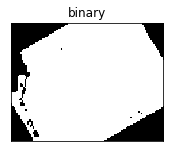

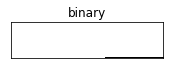

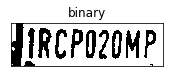

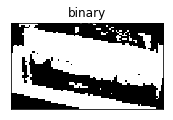

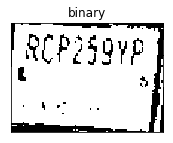

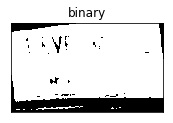

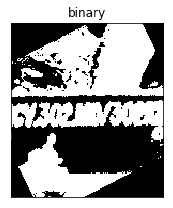

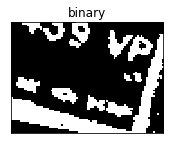

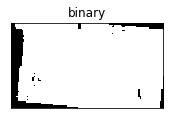

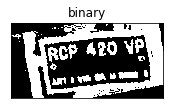

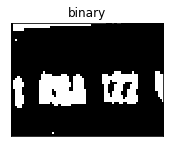

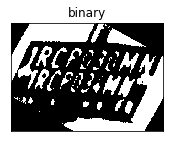

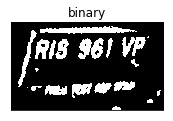

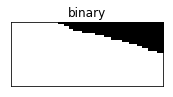

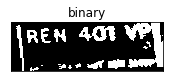

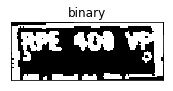

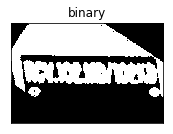

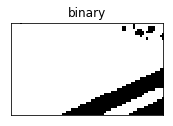

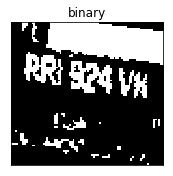

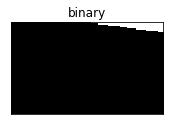

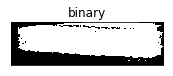

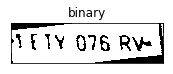

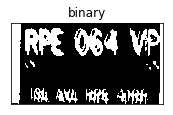

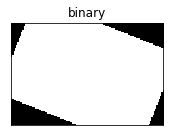

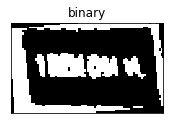

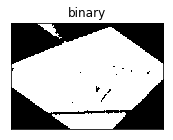

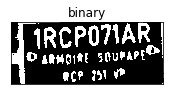

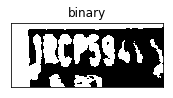

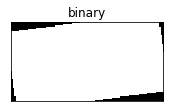

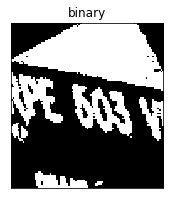

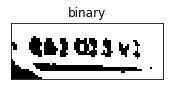

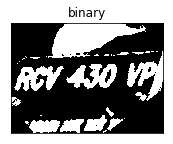

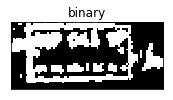

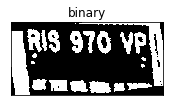

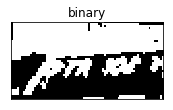

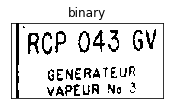

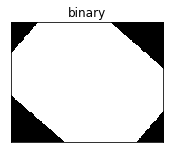

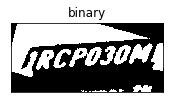

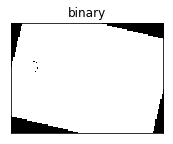

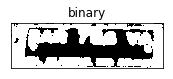

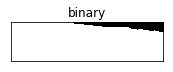

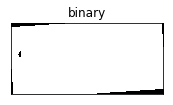

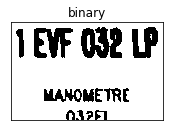

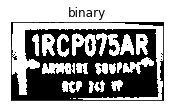

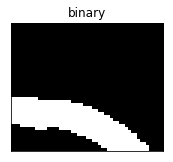

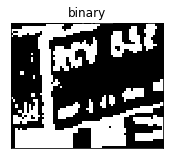

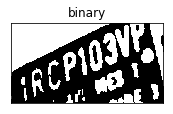

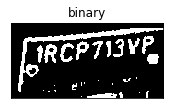

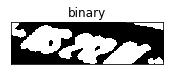

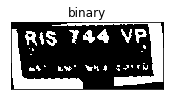

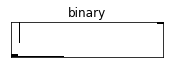

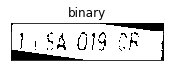

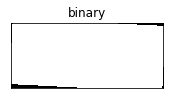

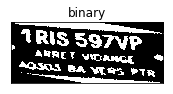

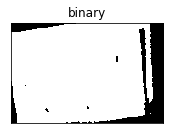

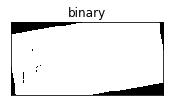

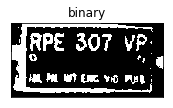

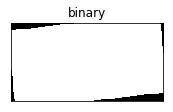

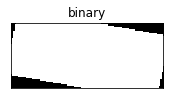

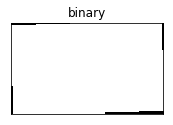

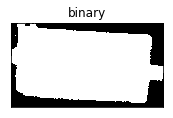

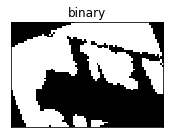

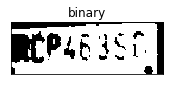

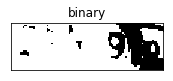

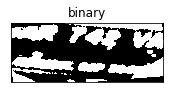

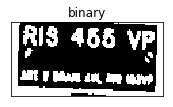

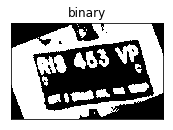

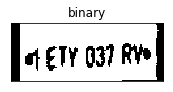

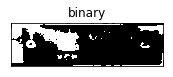

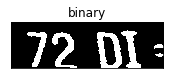

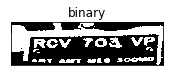

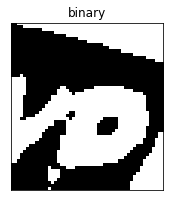

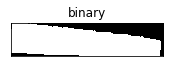

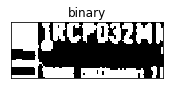

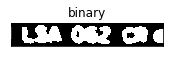

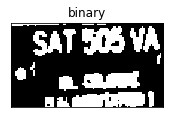

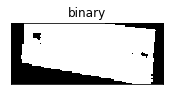

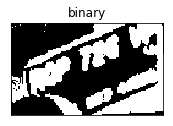

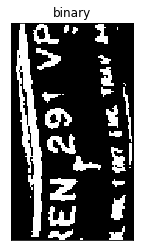

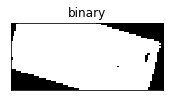

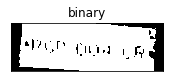

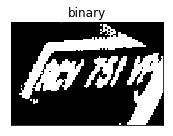

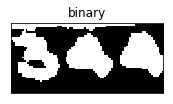

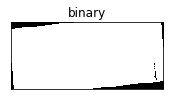

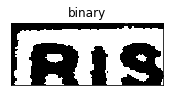

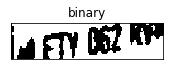

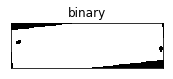

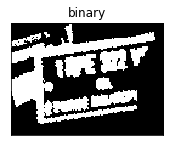

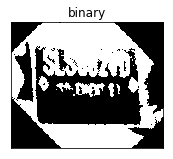

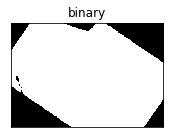

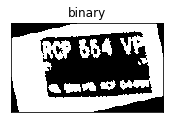

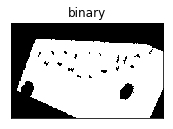

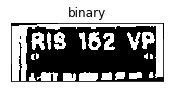

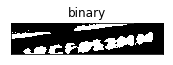

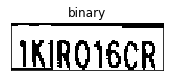

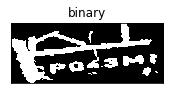

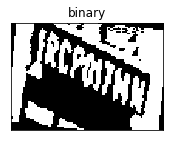

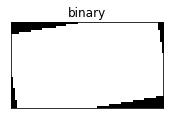

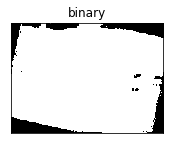

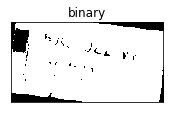

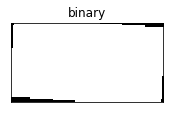

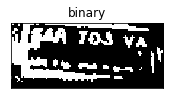

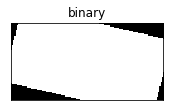

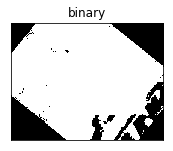

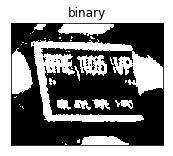

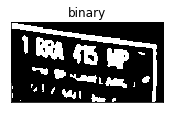

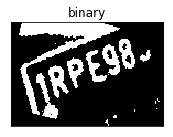

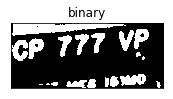

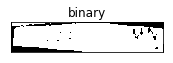

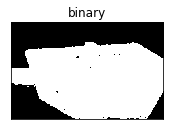

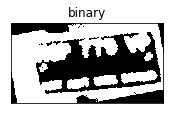

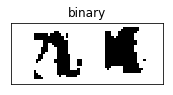

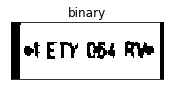

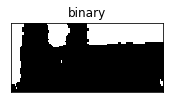

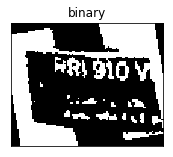

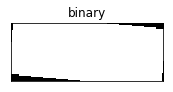

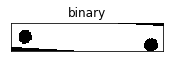

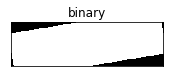

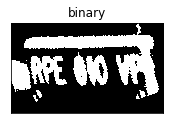

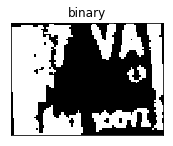

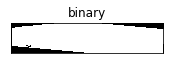

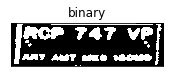

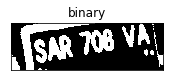

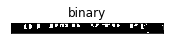

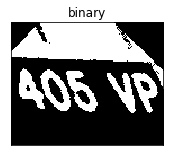

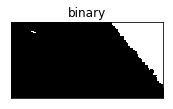

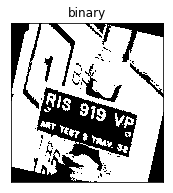

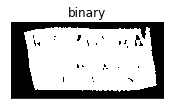

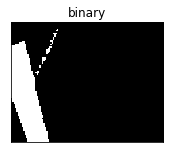

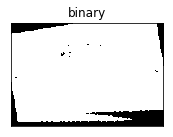

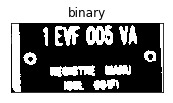

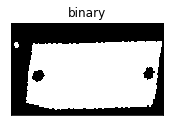

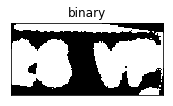

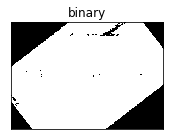

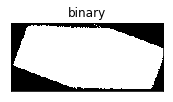

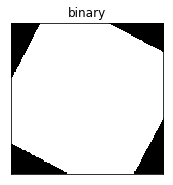

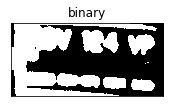

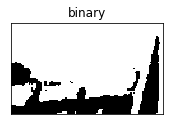

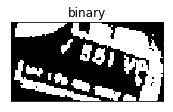

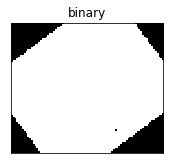

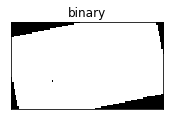

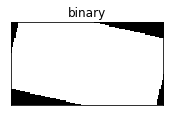

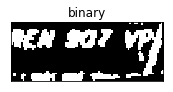

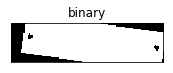

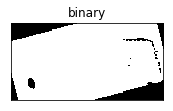

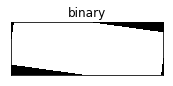

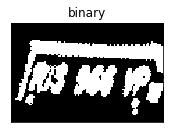

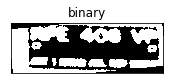

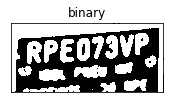

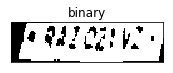

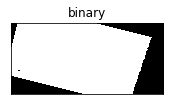

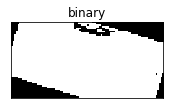

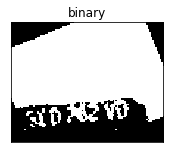

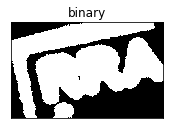

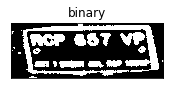

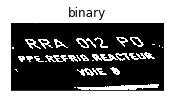

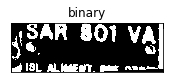

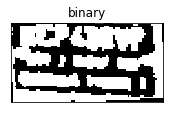

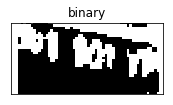

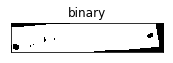

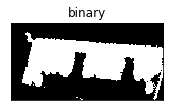

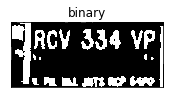

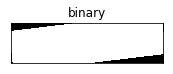

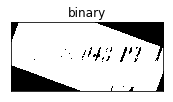

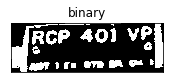

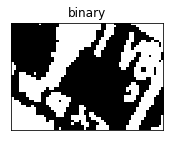

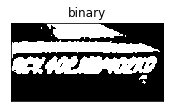

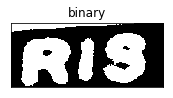

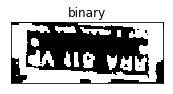

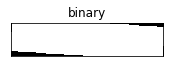

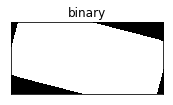

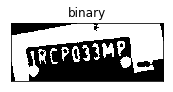

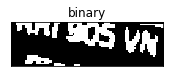

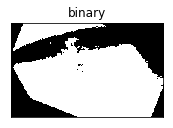

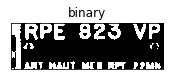

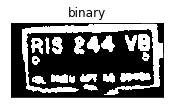

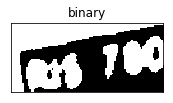

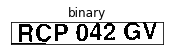

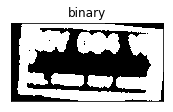

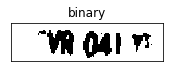

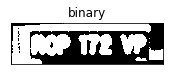

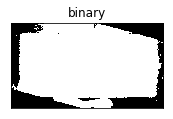

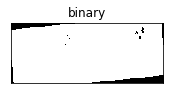

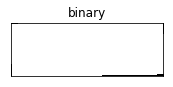

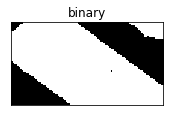

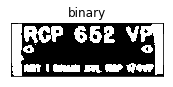

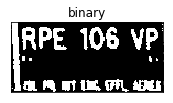

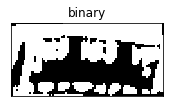

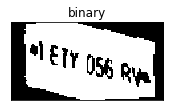

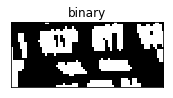

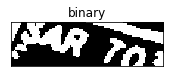

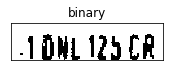

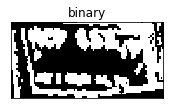

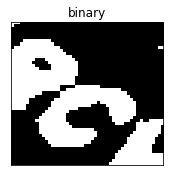

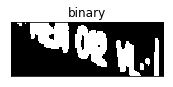

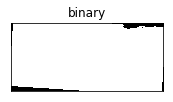

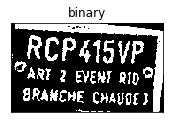

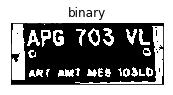

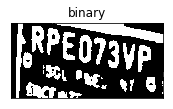

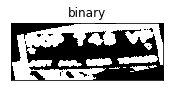

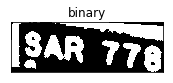

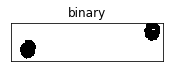

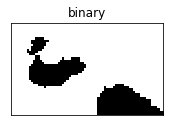

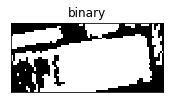

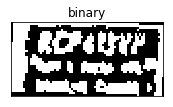

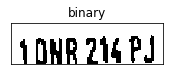

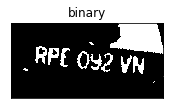

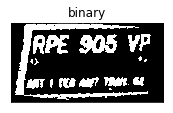

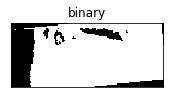

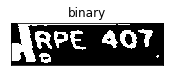

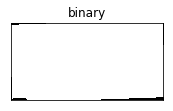

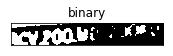

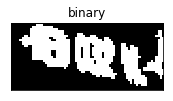

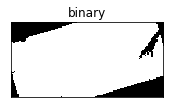

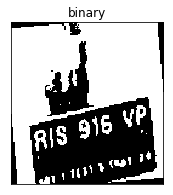

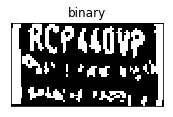

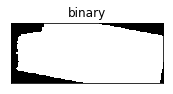

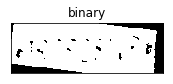

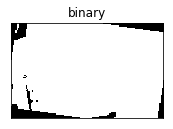

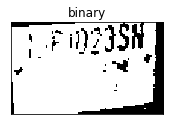

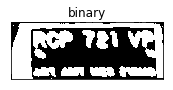

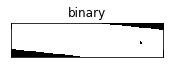

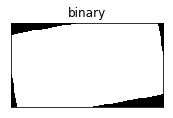

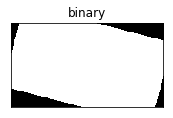

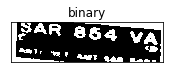

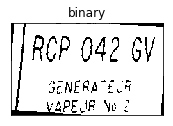

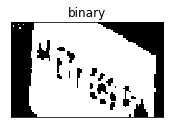

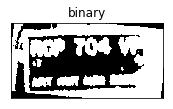

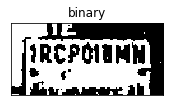

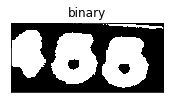

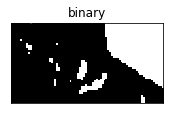

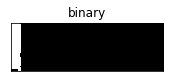

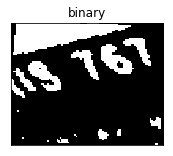

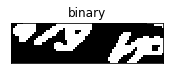

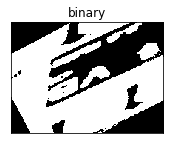

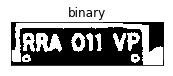

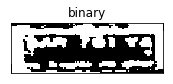

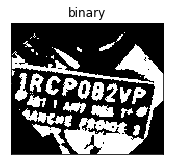

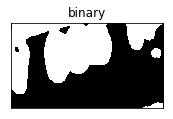

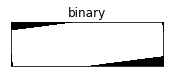

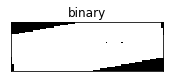

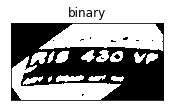

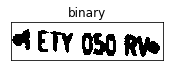

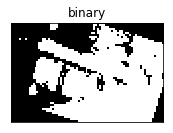

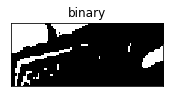

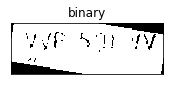

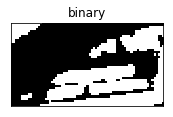

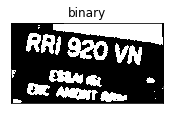

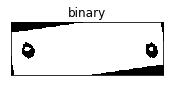

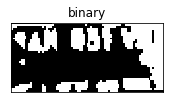

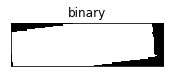

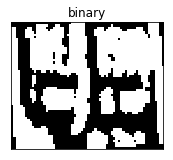

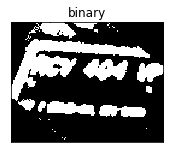

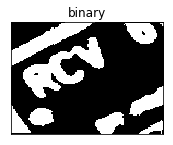

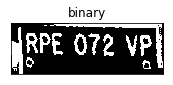

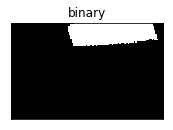

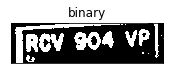

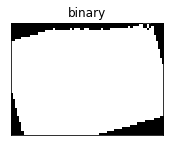

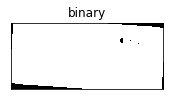

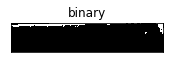

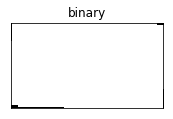

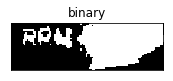

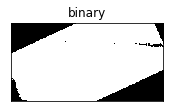

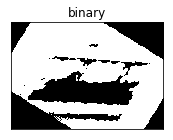

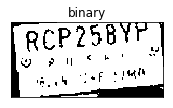

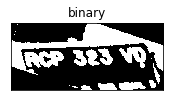

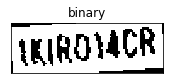

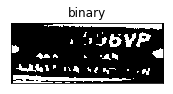

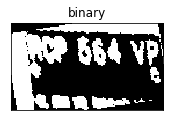

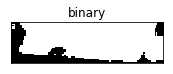

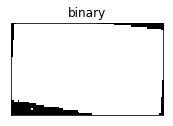

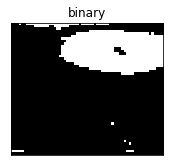

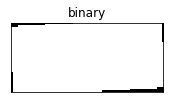

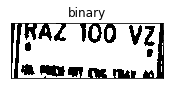

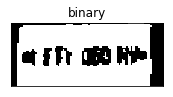

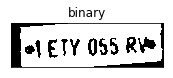

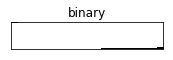

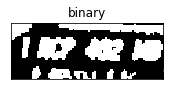

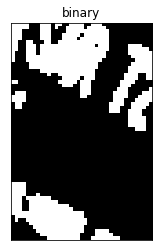

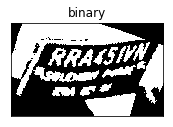

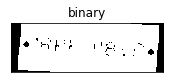

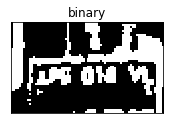

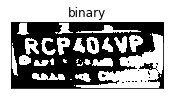

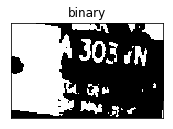

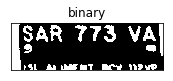

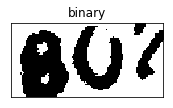

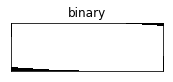

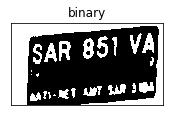

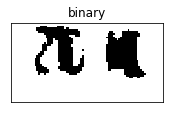

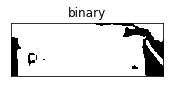

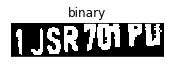

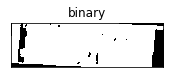

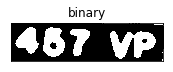

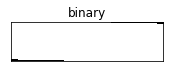

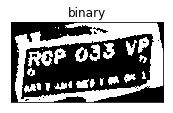

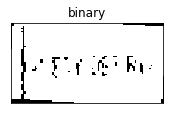

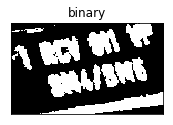

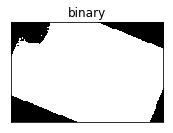

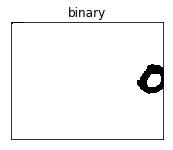

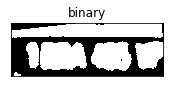

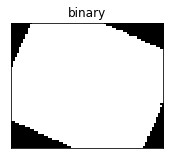

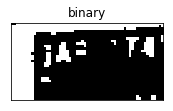

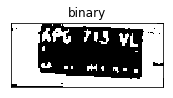

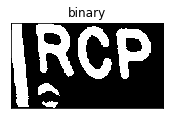

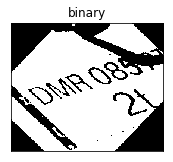

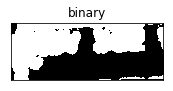

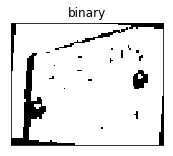

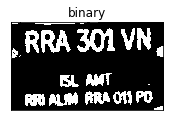

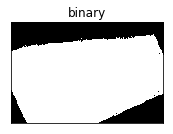

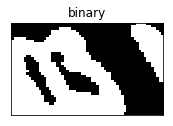

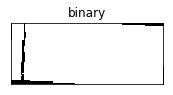

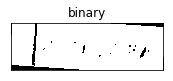

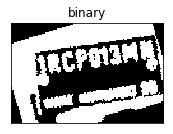

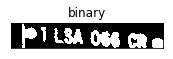

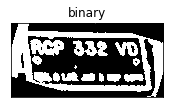

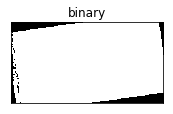

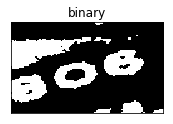

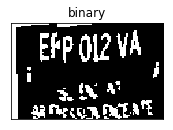

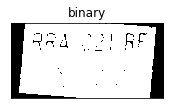

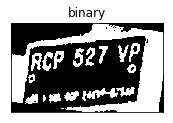

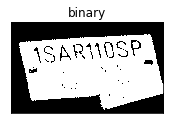

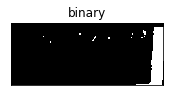

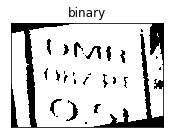

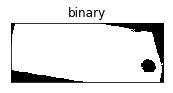

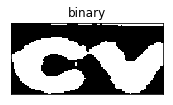

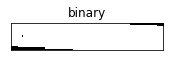

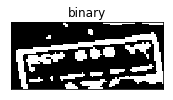

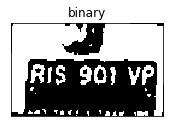

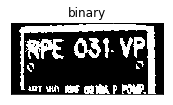

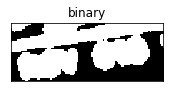

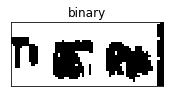

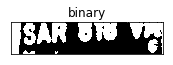

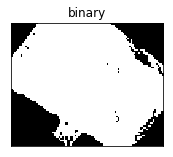

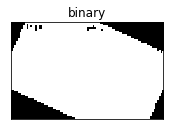

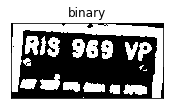

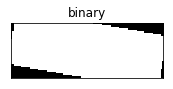

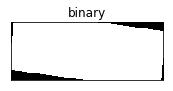

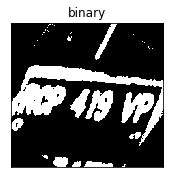

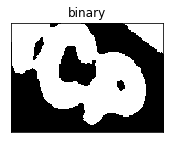

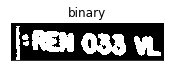

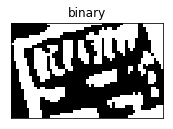

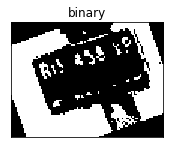

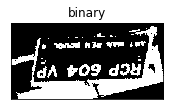

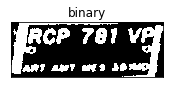

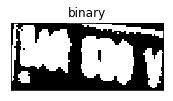

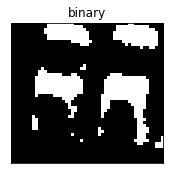

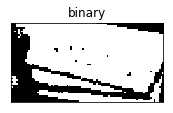

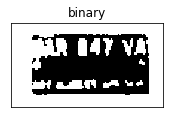

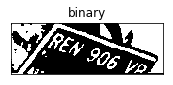

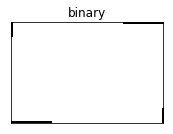

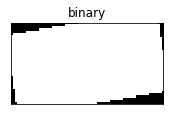

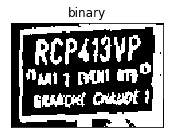

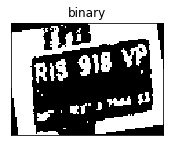

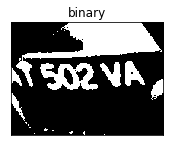

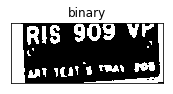

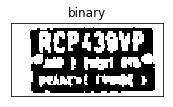

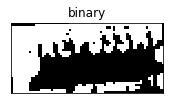

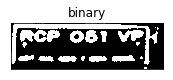

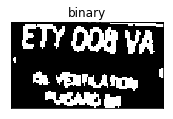

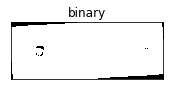

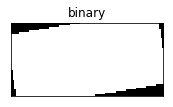

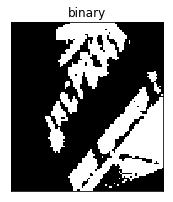

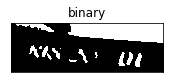

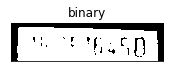

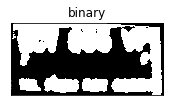

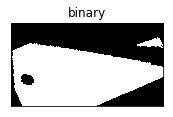

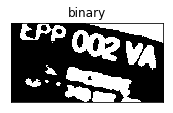

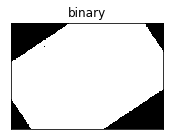

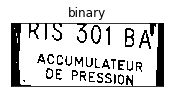

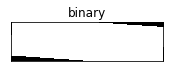

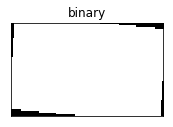

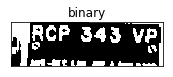

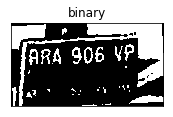

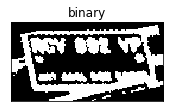

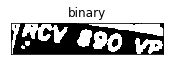

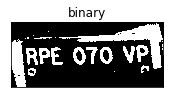

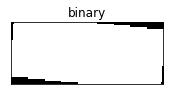

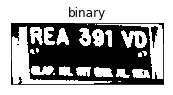

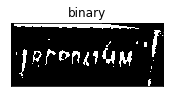

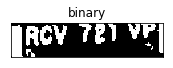

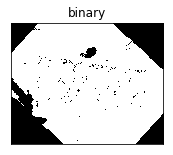

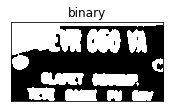

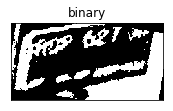

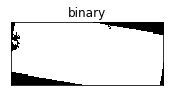

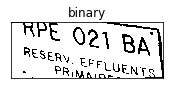

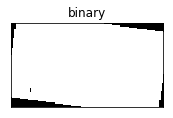

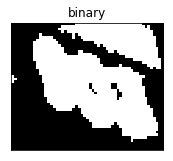

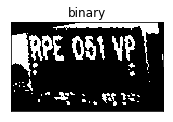

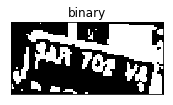

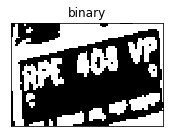

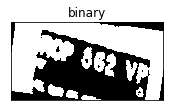

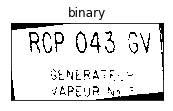

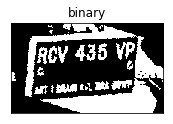

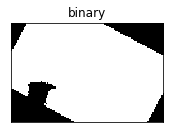

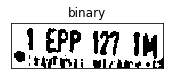

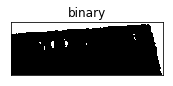

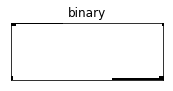

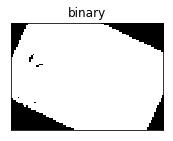

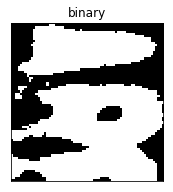

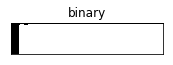

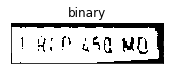

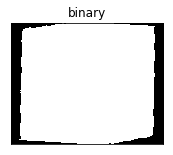

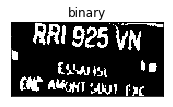

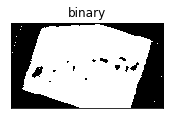

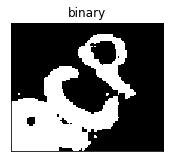

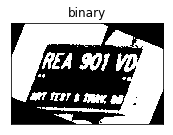

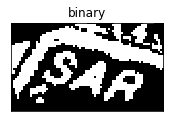

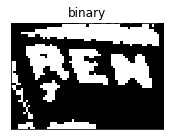

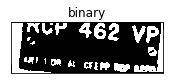

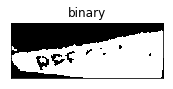

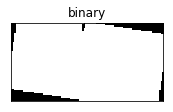

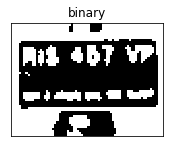

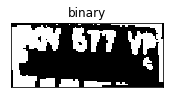

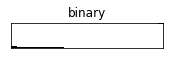

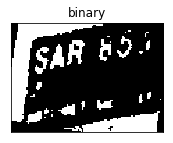

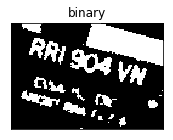

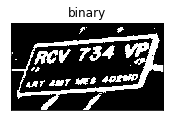

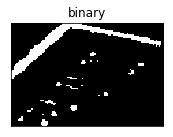

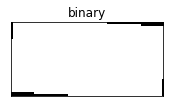

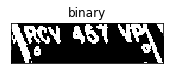

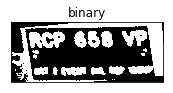

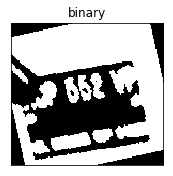

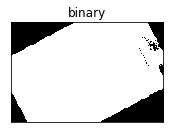

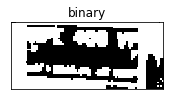

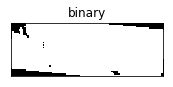

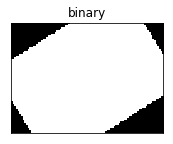

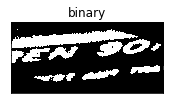

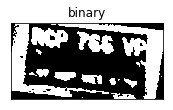

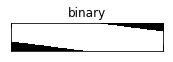

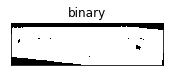

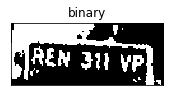

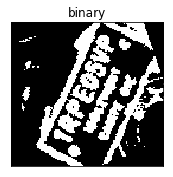

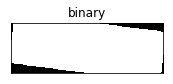

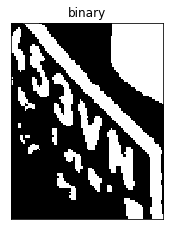

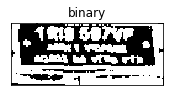

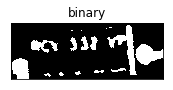

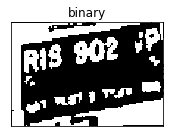

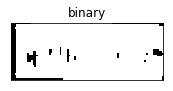

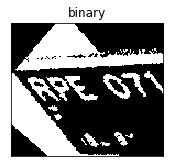

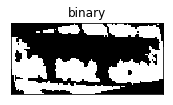

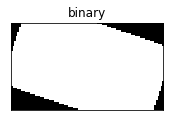

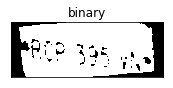

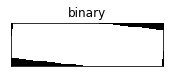

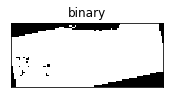

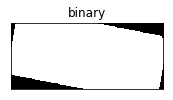

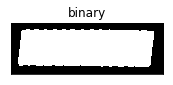

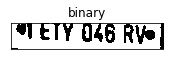

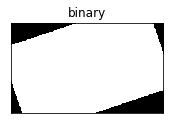

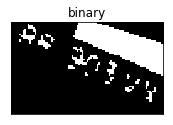

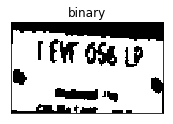

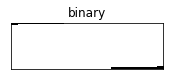

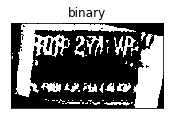

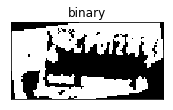

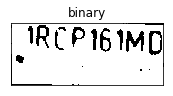

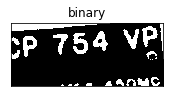

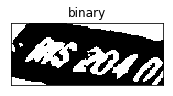

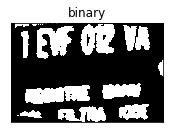

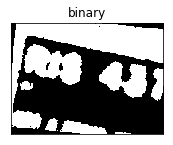

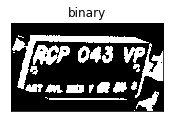

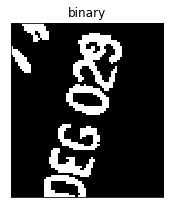

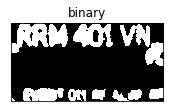

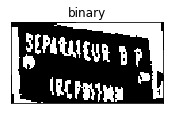

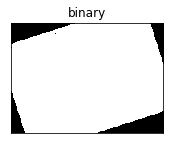

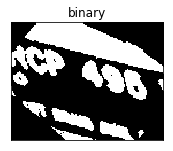

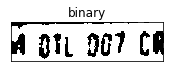

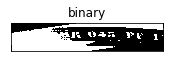

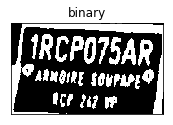

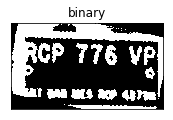

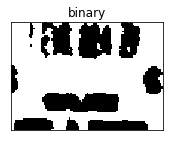

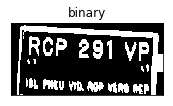

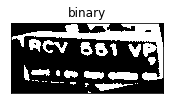

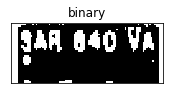

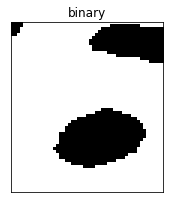

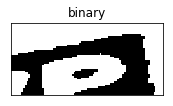

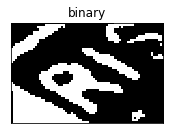

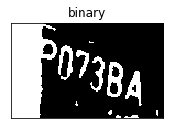

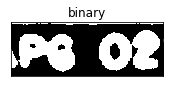

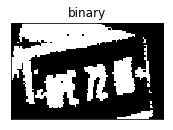

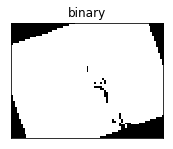

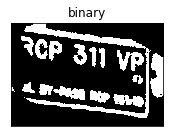

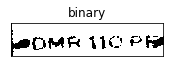

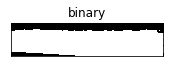

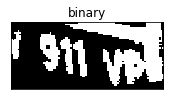

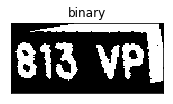

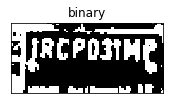

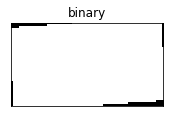

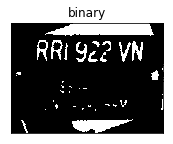

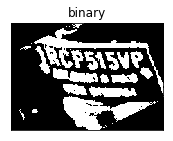

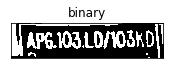

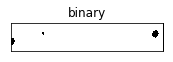

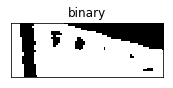

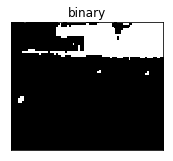

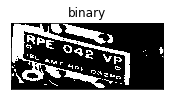

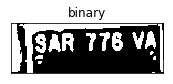

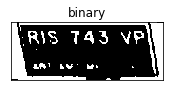

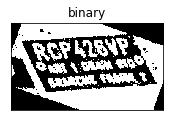

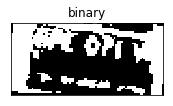

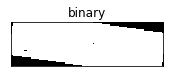

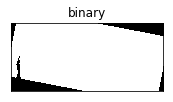

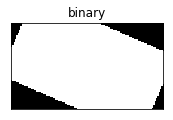

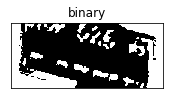

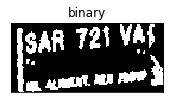

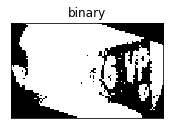

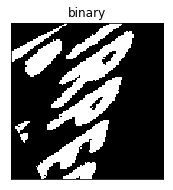

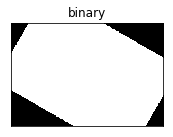

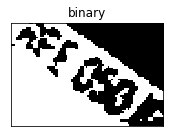

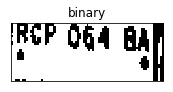

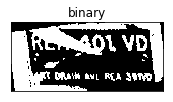

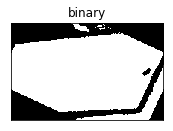

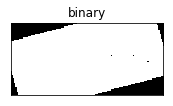

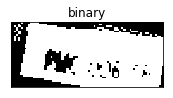

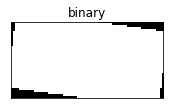

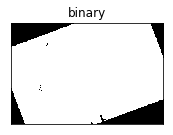

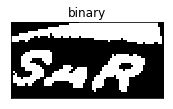

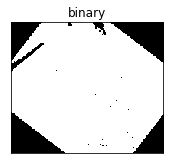

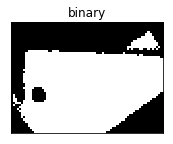

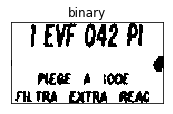

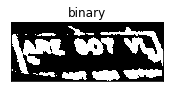

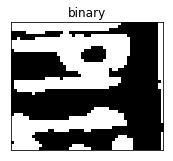

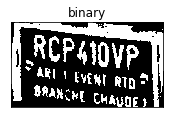

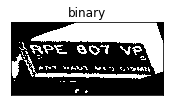

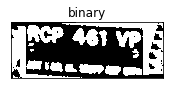

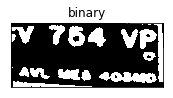

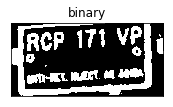

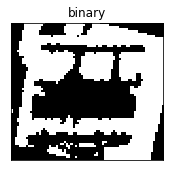

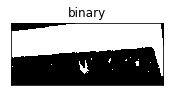

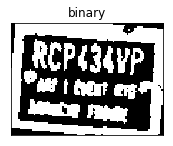

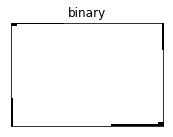

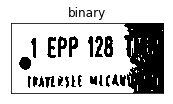

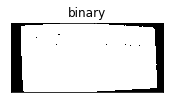

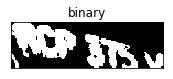

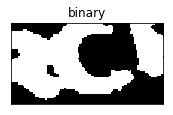

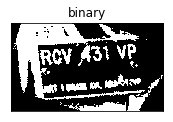

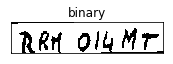

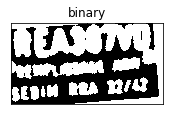

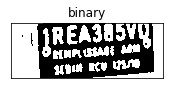

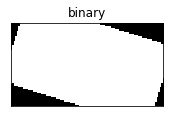

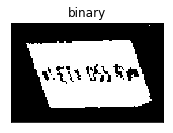

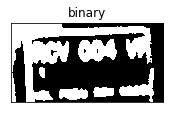

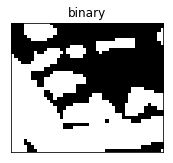

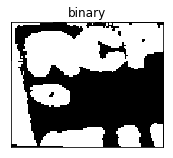

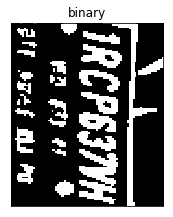

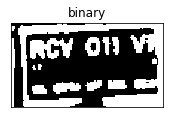

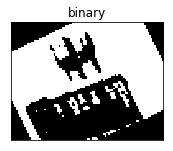

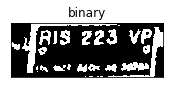

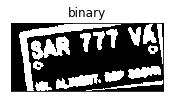

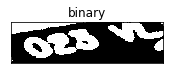

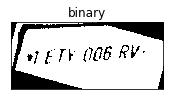

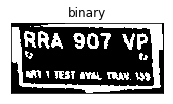

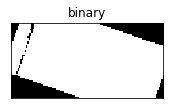

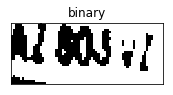

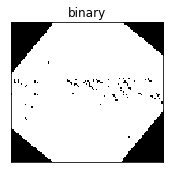

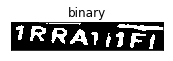

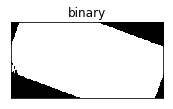

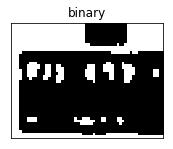

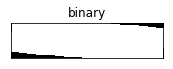

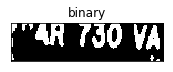

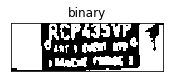

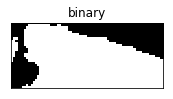

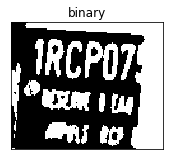

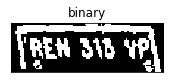

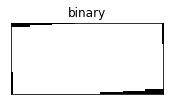

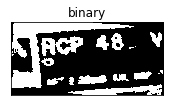

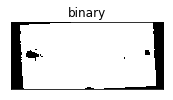

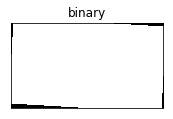

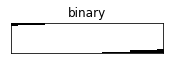

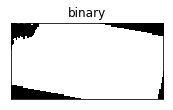

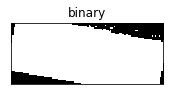

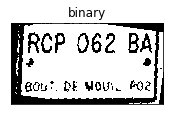

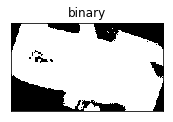

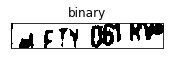

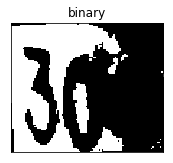

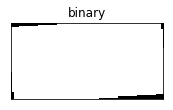

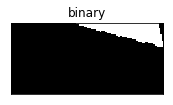

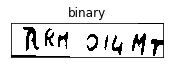

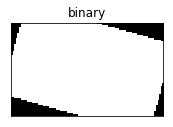

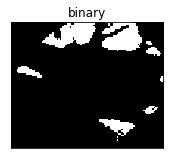

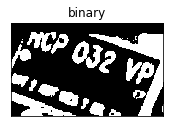

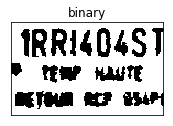

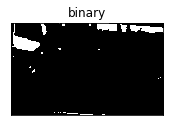

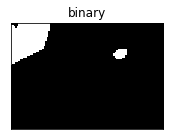

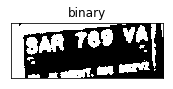

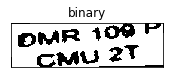

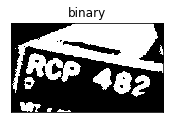

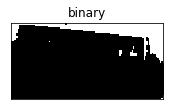

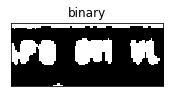

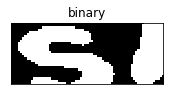

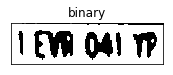

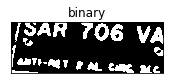

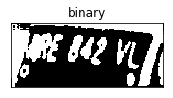

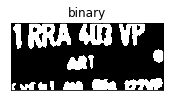

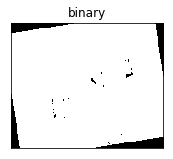

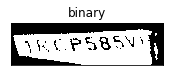

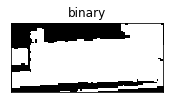

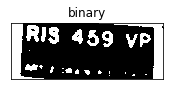

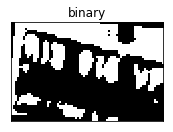

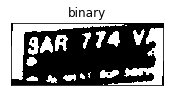

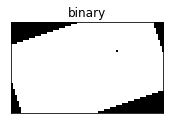

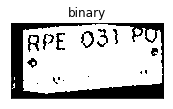

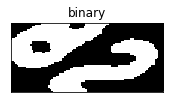

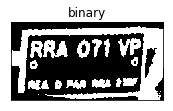

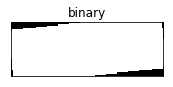

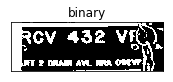

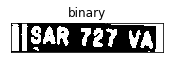

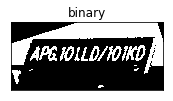

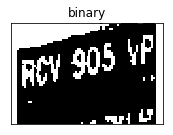

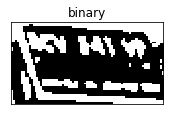

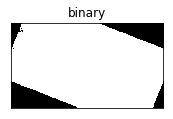

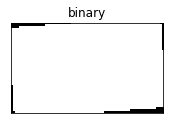

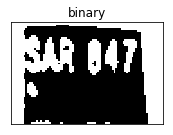

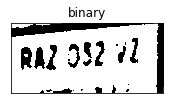

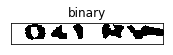

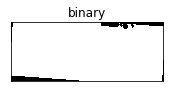

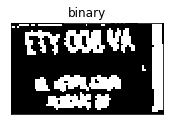

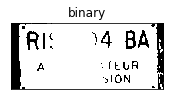

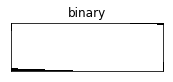

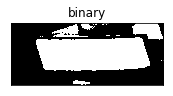

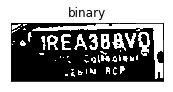

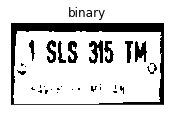

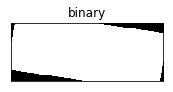

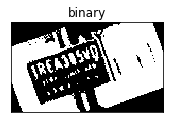

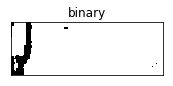

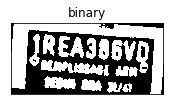

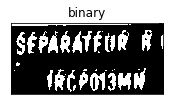

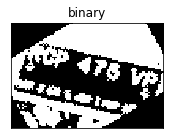

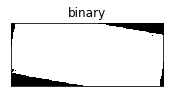

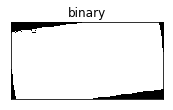

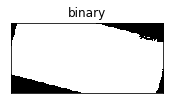

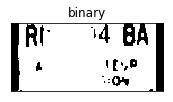

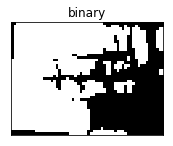

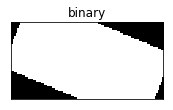

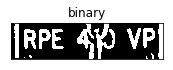

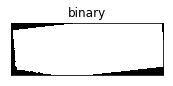

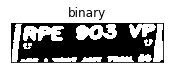

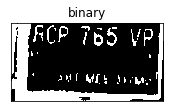

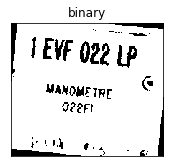

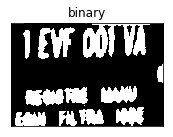

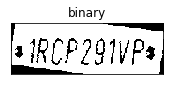

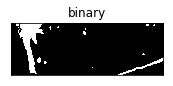

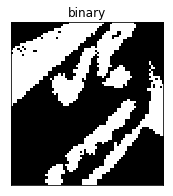

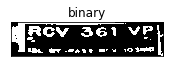

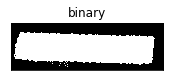

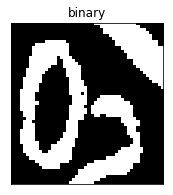

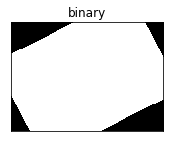

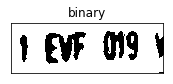

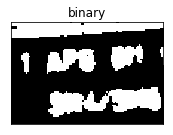

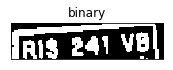

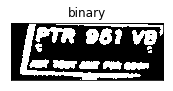

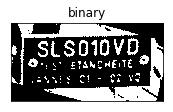

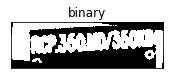

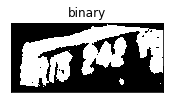

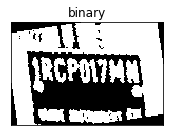

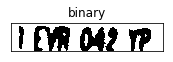

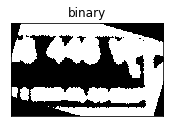

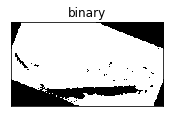

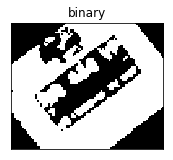

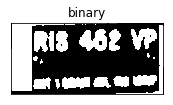

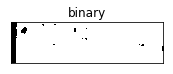

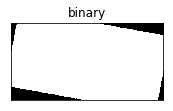

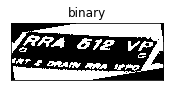

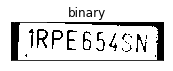

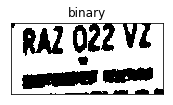

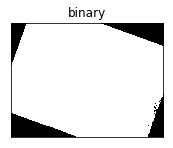

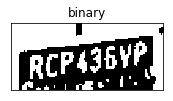

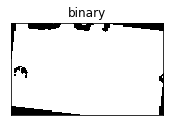

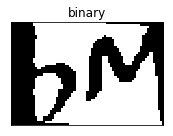

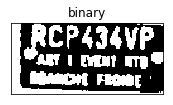

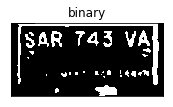

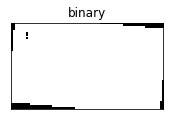

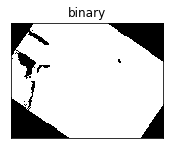

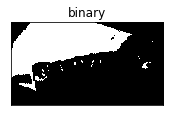

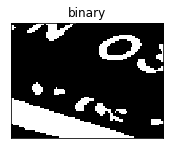

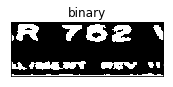

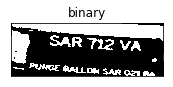

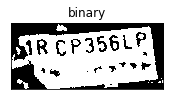

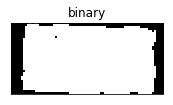

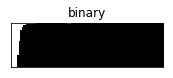

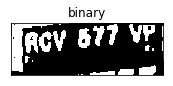

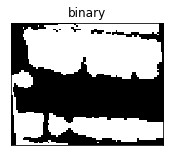

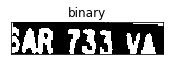

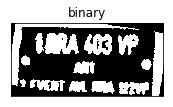

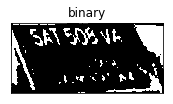

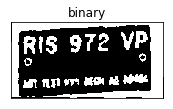

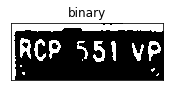

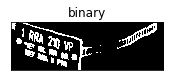

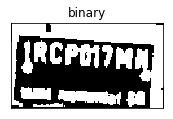

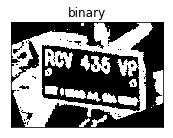

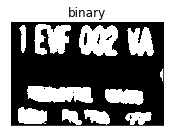

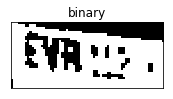

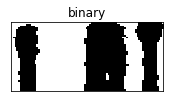

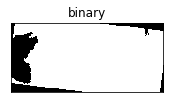

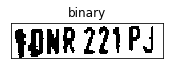

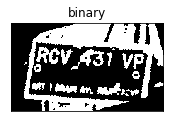

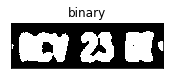

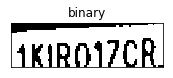

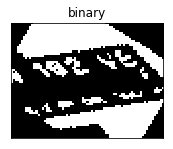

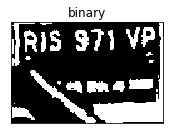

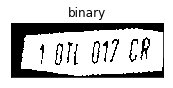

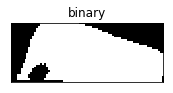

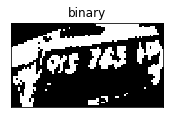

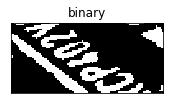

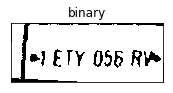

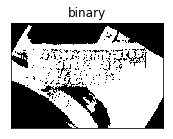

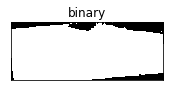

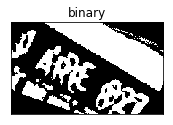

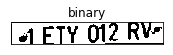

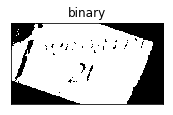

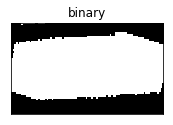

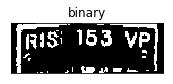

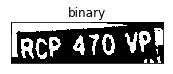

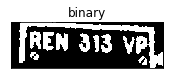

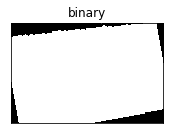

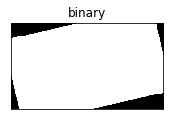

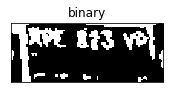

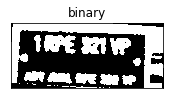

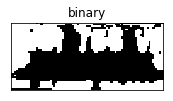

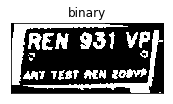

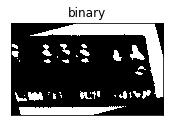

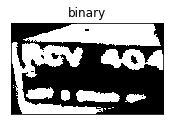

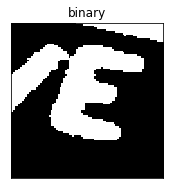

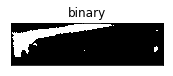

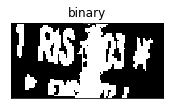

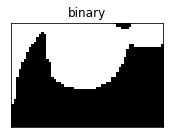

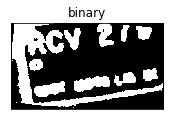

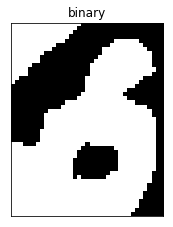

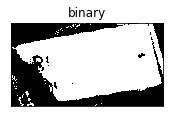

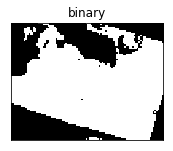

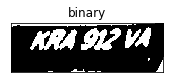

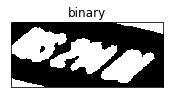

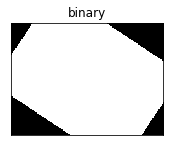

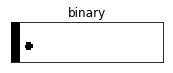

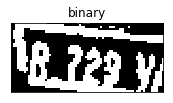

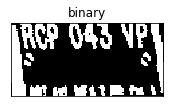

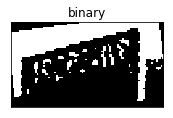

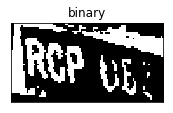

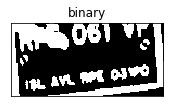

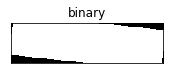

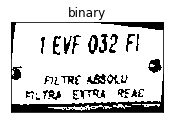

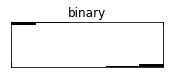

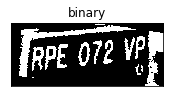

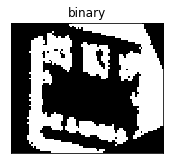

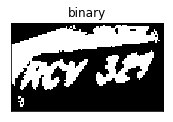

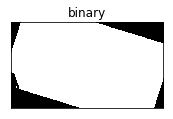

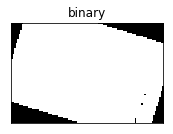

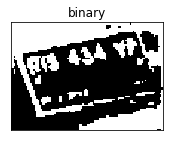

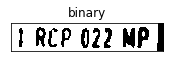

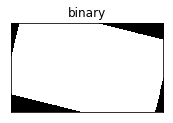

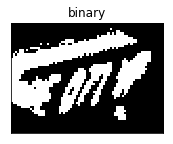

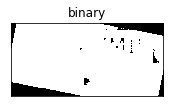

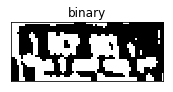

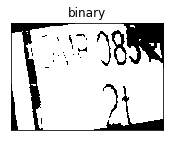

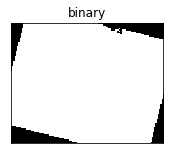

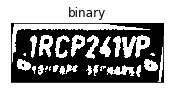

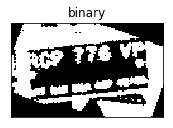

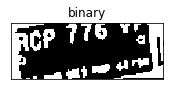

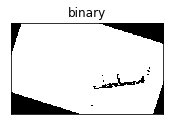

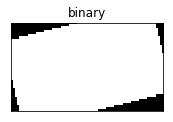

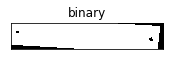

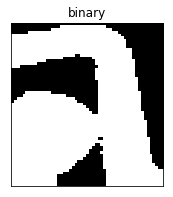

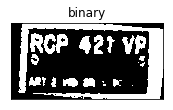

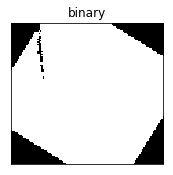

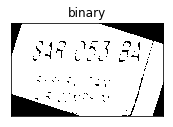

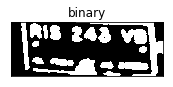

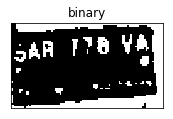

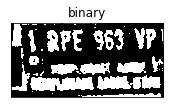

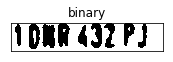

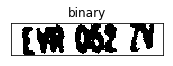

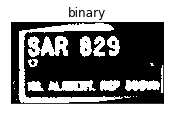

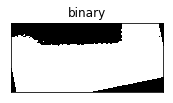

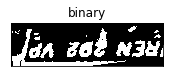

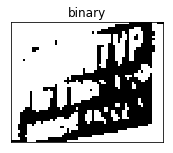

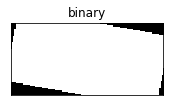

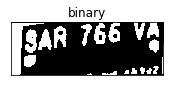

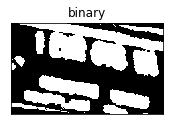

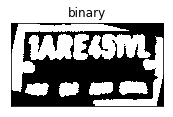

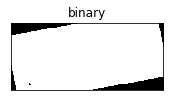

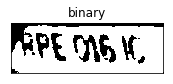

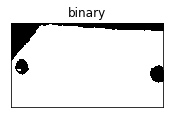

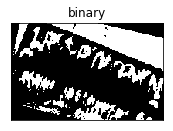

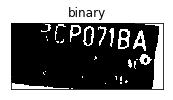

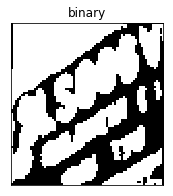

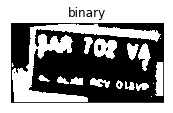

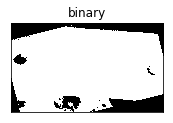

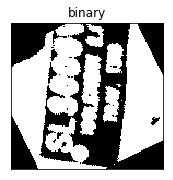

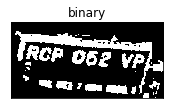

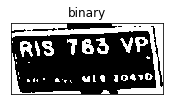

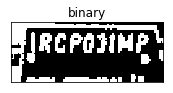

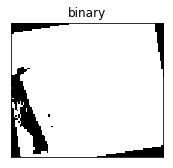

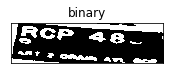

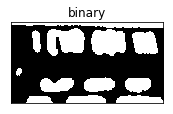

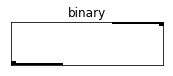

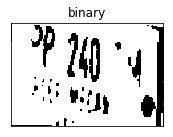

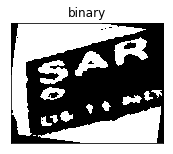

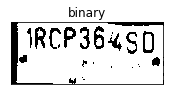

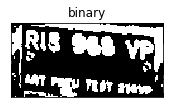

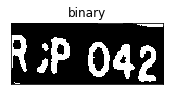

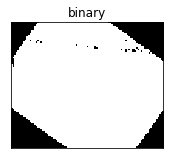

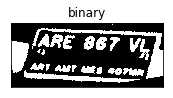

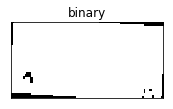

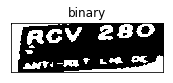

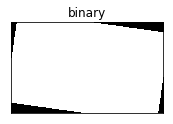

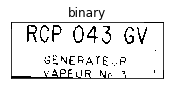

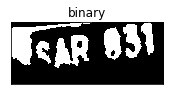

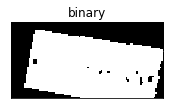

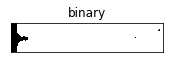

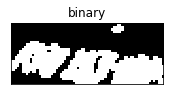

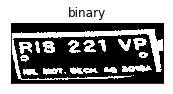

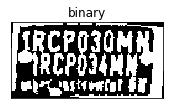

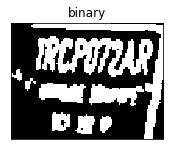

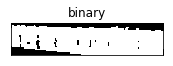

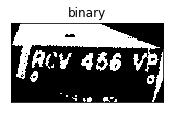

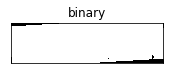

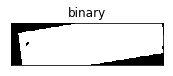

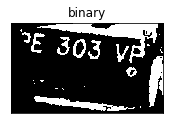

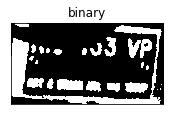

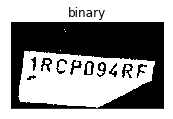

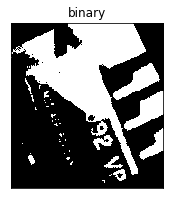

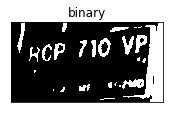

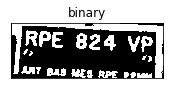

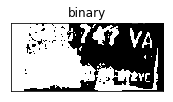

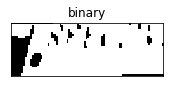

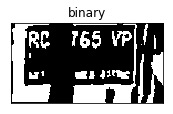

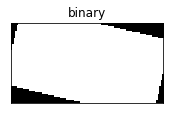

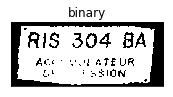

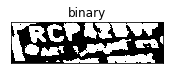

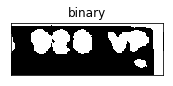

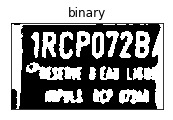

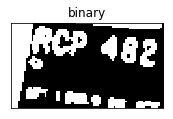

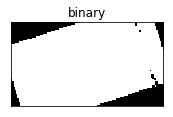

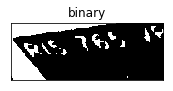

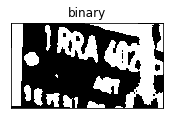

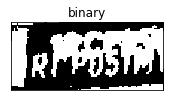

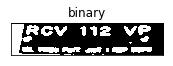

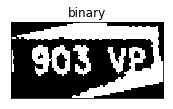

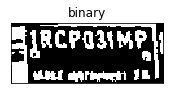

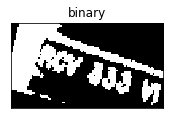

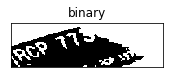

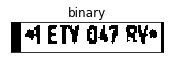

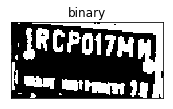

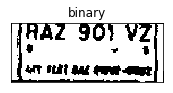

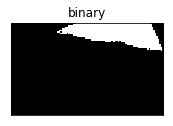

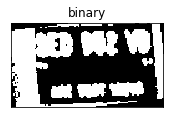

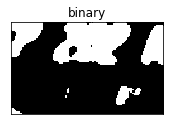

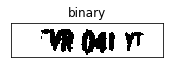

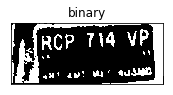

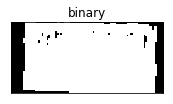

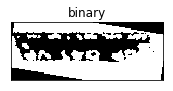

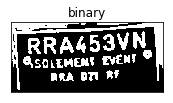

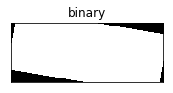

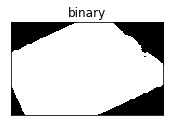

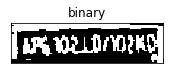

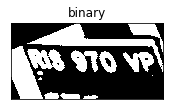

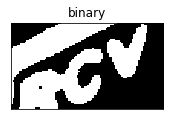

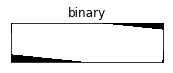

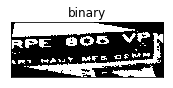

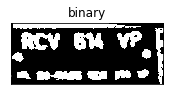

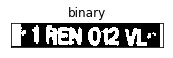

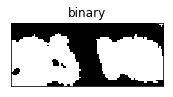

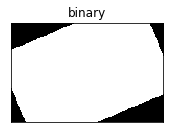

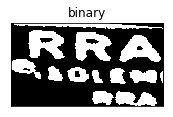

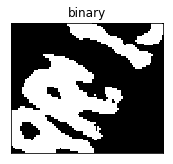

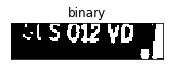

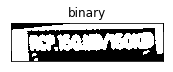

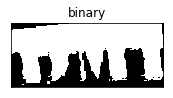

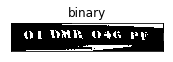

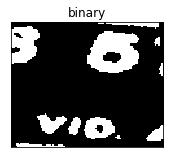

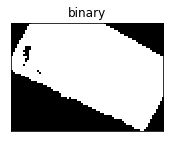

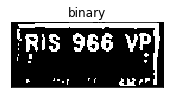

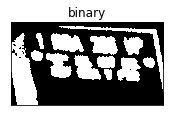

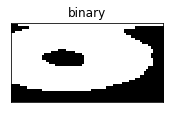

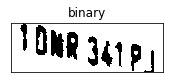

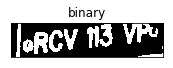

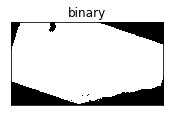

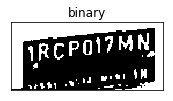

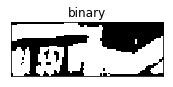

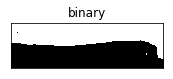

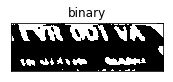

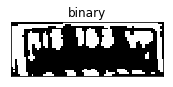

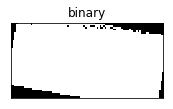

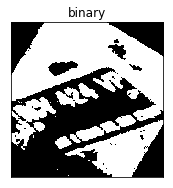

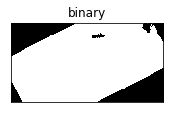

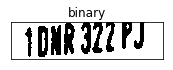

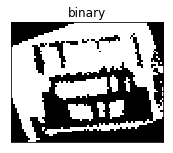

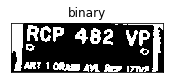

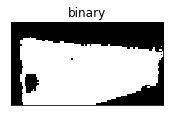

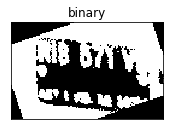

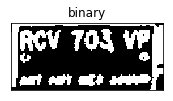

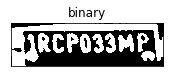

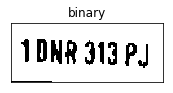

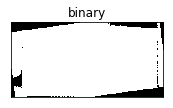

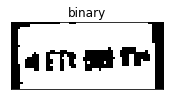

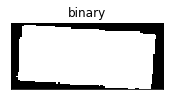

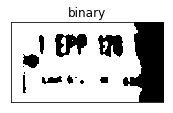

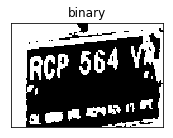

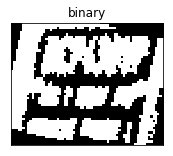

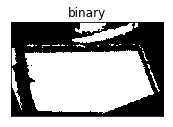

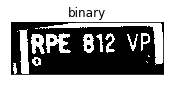

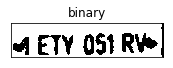

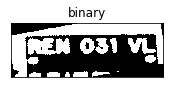

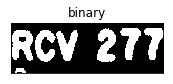

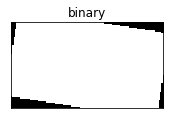

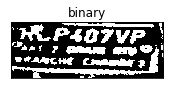

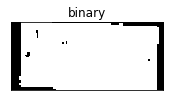

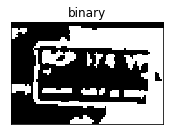

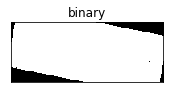

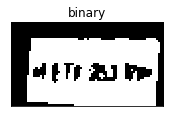

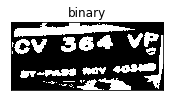

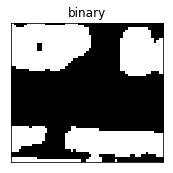

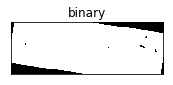

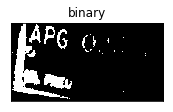

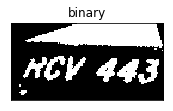

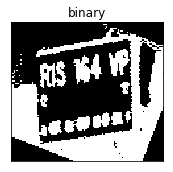

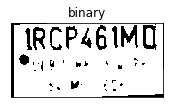

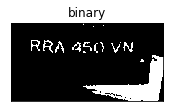

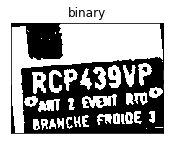

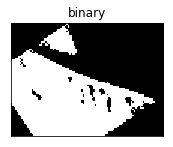

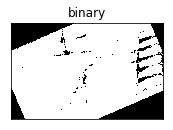

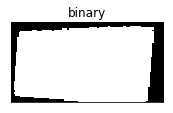

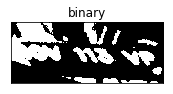

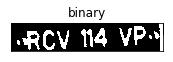

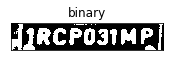

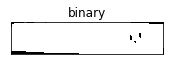

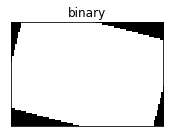

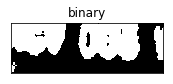

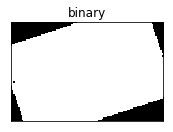

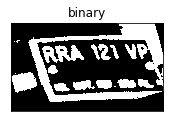

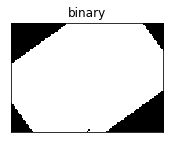

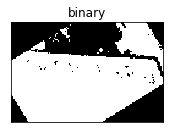

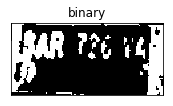

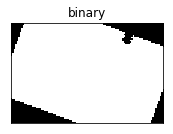

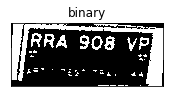

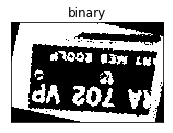

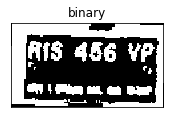

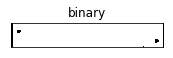

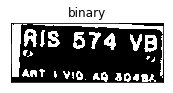

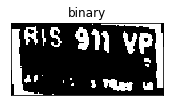

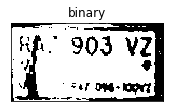

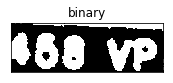

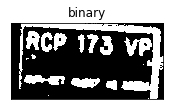

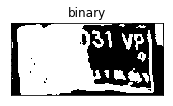

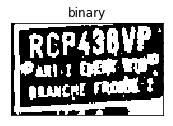

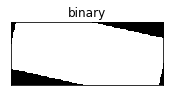

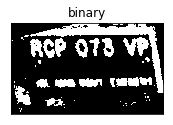

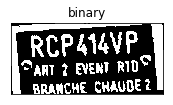

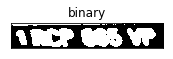

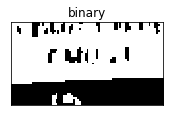

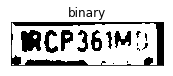

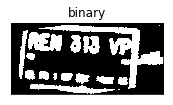

In [22]:

############## all you need to modify
adress = "/Users/yiranchen/Documents/GitHub/tickets/tickets/"
resize = 1 #0.15
box_size = 0.1 # the size of box is ten percent larger than orginal size, set 0 if don't want to enlarge the size of box
###############


tickets_true_equi = adress+"tickets_true_equi/"
#tickets_true_equi = adress+"tickets_true_extra_equi/"
tickets_save = adress+"tickets_save/"
tickets_save1=adress+"tickets_save_01/"
#tickets_save = adress+"tickets_save_extra/"

if not os.path.exists(tickets_true_equi):
    os.makedirs(tickets_true_equi)

if not os.path.exists(tickets_save):
    os.makedirs(tickets_save)
    
files = os.listdir(tickets_true_equi)

imagefiles = {}
txtfiles = {}

for file in files:
    match = re.match(r'(.*\_)(\d*\_)(\w{8,9})(\.jpg)', file) # regular expression
    if match:
        image = match.group(0)
        imagefiles[match.group(1)+match.group(2)+match.group(3)] = image
        
for file in files:
    match = re.match(r'(.*\_)(\d*\_)(\w{8,9})(\.txt)', file) # regular expression
    if match:
        txtfile = match.group(0)
        txtfiles[match.group(1)+match.group(2)+match.group(3)] = txtfile

assert len(imagefiles) == len(txtfiles)

for key in txtfiles.keys():
    im = Image.open(tickets_true_equi+imagefiles[key])
    #print(imagefiles[key]+'.jpg')
    im_array = np.array(im)
    height, width, rgb = im_array.shape
    txt_file = open(tickets_true_equi+txtfiles[key],'r')
    line = txt_file.readline()
    line_content = line.split(',')
    txt_file.close()
    new_txt = open(tickets_save+txtfiles[key],'w')
    new_txt.write(line_content[-1])
    new_txt.close()
    
    x = []
    y = []
    for i in range(4):
        x.append(int(line_content[2*i]) * resize)
        y.append(int(line_content[2*i+1]) * resize)
    if abs(x[1]-x[0]) > abs(x[0]-x[-1]):
        if x[3]-x[2] != 0:
            angle = math.degrees(math.atan((y[3]-y[2])/(x[3]-x[2])))
        else:
            angle = 0.0
    else:
        if x[2] - x[1] != 0:
            angle = math.degrees(math.atan((y[2]-y[1])/(x[2]-x[1])))
        else:
            angle = 0.0
        
            
    x_left = min(x)
    x_right = max(x)
    x_length = x_right - x_left
    x_left -= int(box_size/2 * x_length)
    x_right += int(box_size/2 * x_length)
    y_up = max(y)
    y_down = min(y)
    y_length = y_up-y_down
    y_up += int(-box_size/2 * y_length)
    y_down -= int(-box_size/2 * y_length)
    #y_up += int(box_size/2 * y_length)
    #y_down -= int(box_size/2 * y_length)
    if y_down < 0:
    	y_down = 0
    if y_up >= height:
    	y_up = height-1
    if x_left < 0:
    	x_left = 0
    if x_right >= width:
    	x_right = width-1
    ticket = im_array[y_down:y_up,x_left:x_right,:]
    ticket_im = Image.fromarray(ticket)
    ticket_im = ticket_im.rotate(angle)
    
    #ticket_im_array = np.array(ticket_im)
    #height, width, rgb = ticket_im_array.shape
    #ticket_im_array = ticket_im_array[int(box_size/2 * height):int(height*(1-box_size/2)-1),:,:]
    #ticket_im = Image.fromarray(ticket_im_array)
    
    # pre processing
    new_im = ticket_im.convert('L')
    new_im2 = new_im.filter(ImageFilter.EDGE_ENHANCE_MORE)
#     new_im2 = new_im2.filter(ImageFilter.MedianFilter())
    
    #enhancer = ImageEnhance.Contrast(new_im2)
    #new_im2 = enhancer.enhance(0.5)
    
    ticket_im.save(tickets_save+imagefiles[key])
    new_im2.save(tickets_save+key+'_1'+'.jpg')
    img=binarify(tickets_save+key+'.jpg',23)
    cv2.imwrite(tickets_save1+key+'_2'+".jpg",img)





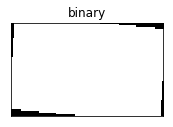

array([[  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)

In [20]:
binarify(tickets_save+"CAT_1_5002_23_1EVR022ZV.jpg",19)